<a href="https://colab.research.google.com/github/pedroivo14/curso_analise_dados_industriais_unibp_radix_nov_dec_2025/blob/main/Trabalho_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Trabalho Final — Disciplina de Análise e Exploração de Dados Industriais**
## **Aplicações no Setor de Óleo, Gás e Energia**

### **Grupo 4 — Integrantes**
- Bárbara Santos Munhão  
- Caique Emanuel da Silva Nunes  
- João Victor Barros dos Santos  
- Pedro Ivo Neto



Última modificação: 03/12/2025

# Executive Summary: Principais conclusões

**Contexto**

***A perfuração de poços inclui diversas etapas e operações.*** Cada etapa da operação envolve transições entre diferentes modos de funcionamento, como perfuração, circulação, conexão e movimentações da coluna de perfuração.

A correta identificação do estado operacional, conhecido como ***Rig State***, é essencial para garantir segurança, eficiência e tomada de decisão em tempo real.  

A classificação precisa dessas operações permite monitoramento avançado, detecção precoce de anomalias e otimização das rotinas de campo, reduzindo custos operacionais e mitigando riscos.

**Caracterização do Problema e Variáveis Disponíveis**


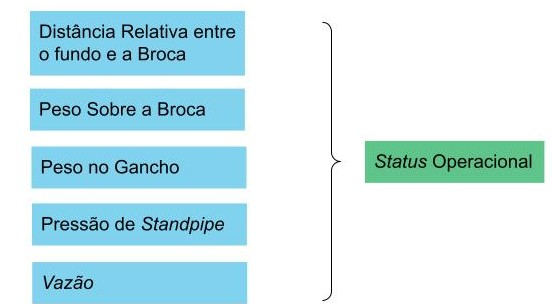

**Conjunto Dados**
- 5 mil exemplos rotulados
- Variável **target** categórica (multiclasse)
- 6 *features*


Fonte: Disponibilizado pelo curso.



---
*Exemplo*
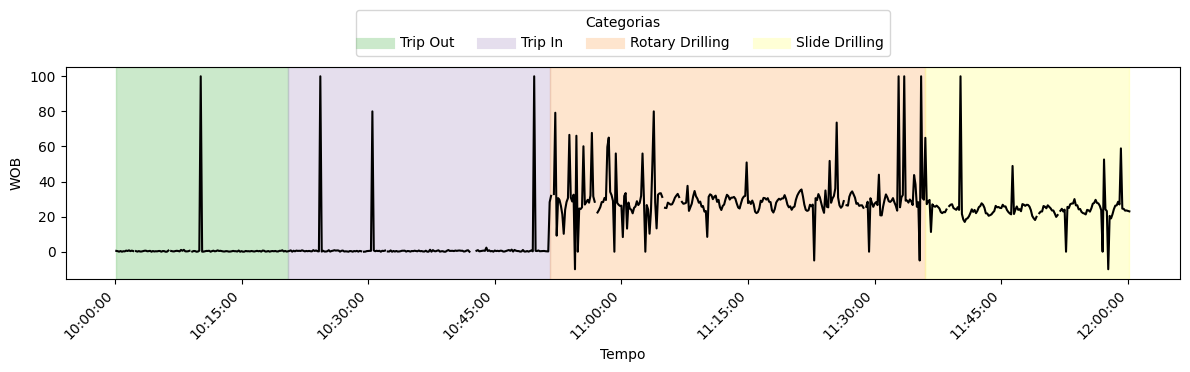

**Metodologia de Desenvolvimento**

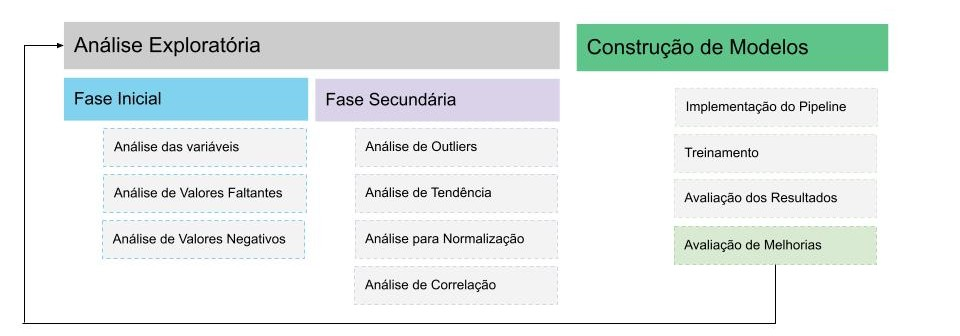

**Técnicas Adotadas**
- Análise exploratória das variáveis
  - Boxplot e Histograma

- Análise de correlação
  - Pearson
  - Spearman
  - Kendall
- Remoção de *outliers* por desvio padrão
- Suavização com dos dados com mediana móvel
- Comparação de 3 tipos de classificadores



**Conclusões**

**Dados**

- Utilização de todas as variáveis disponíveis
- As variáveis fornecidas foram suficientes e adequadas para a classificação

**Modelo**
- Árvore de Decisão
  - **F1-score weighted** de **98.07%**
  - Classificador teve um bom desempenho mesmo considerando o desbalanceamento natural entre as categorias.

# Contexto do Problema: Descrição do cenário industrial e objetivos

No processo de perfuração de poços de petróleo, a correta identificação do estado operacional, conhecido como *Rig State*, é essencial para garantir segurança, eficiência e tomada de decisão em tempo real. Cada etapa da operação envolve transições entre diferentes modos de funcionamento, como perfuração, circulação, conexão e movimentações da coluna de perfuração. A classificação precisa dessas operações permite monitoramento avançado, detecção precoce de anomalias e otimização das rotinas de campo, reduzindo custos operacionais e mitigando riscos.

A etapa de aquisição de dados de perfuração gera séries temporais complexas, compostas por sinais de superfície que refletem o comportamento do sistema mecânico e hidráulico. Entretanto, esses dados estão sujeitos a ruídos, variações operacionais e diferentes padrões de operação entre poços e equipes, exigindo um pré-processamento robusto antes da construção de qualquer modelo de aprendizado de máquina. Assim, é necessário compreender e tratar adequadamente as variáveis envolvidas para que o classificador seja capaz de capturar padrões consistentes e generalizáveis.

Para este estudo, estão disponíveis cinco variáveis contínuas fundamentais para representar o comportamento do sistema:

- **DEPT_BDEP_DIFF** – Diferença relativa entre a profundidade atual e a profundidade do fundo. Unidades típicas: **pés (ft) ou metros (m)**.
- **WOB (Weight on Bit)** – Peso aplicado diretamente na broca, indicador primário da interação mecânica com a formação. Unidades típicas: **kN** ou **klbf**.
- **HOOK_LOAD** – Peso total sustentado no topo da sonda, associado à movimentação da coluna e ao estado de carga no sistema. Unidades típicas: **kN** ou **klbf**.
- **SPP (Standpipe Pressure)** – Pressão no tubo de standpipe, representando o comportamento hidráulico da circulação de fluido. Unidades típicas: **psi** ou **MPa**.
- **FLOW_RATE** – Taxa de bombeio da lama, determinante para estados de circulação e condicionamento do poço. Unidades típicas: **gpm** ou **L/min**.

Além dessas variáveis numéricas, a variável categórica **OPERATION** representa o estado operacional real, servindo como rótulo para treinamento e avaliação do classificador.

O objetivo desta etapa é realizar um estudo aprofundado de pré-processamento dos dados, envolvendo análise exploratória, detecção e correção de inconsistências, normalização/escala, tratamento de ruídos e possíveis transformações necessárias para melhorar a separabilidade entre os estados. Esse tratamento adequado é crucial para o desenvolvimento posterior de um classificador robusto e eficiente para identificação automática dos *Rig States*, contribuindo para operações de perfuração mais seguras, econômicas e inteligentes.

# Análise Exploratória: Insights descobertos com visualizações

In [ ]:
"""
---------------
Importação das bibliotecas necessárias
"""

# Bibliotecas de terceiros para análise de dados e visualização
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.dates as mdates

In [ ]:
df = pd.read_csv('dados_drilling_operations - Grupo 3 e 4.csv')

Antes da realização de uma análise exploratória dos dados, vamos fazer uma avaliação geral do dados, buscando entender sua disponibilidade e característias.

In [ ]:
df.head()

,TIMESTAMP,DEPT,BDEP,DEPT_BDEP_DIFF,RPM,ROP,WOB,TORQUE,SPP,FLOW_RATE,HOOK_LOAD,OPERATION
0,2024-06-15 06:00:00,2800.135417,2800.014518,0.120899,129.018100,26.591119,30.207158,19.291741,4078.517986,1083.469064,199.610338,Rotary Drilling
1,2024-06-15 06:00:10,2799.713580,2800.218534,-0.504954,142.475391,33.454959,32.854322,21.205674,4135.676653,1111.331174,191.493554,Rotary Drilling
2,2024-06-15 06:00:20,2800.728758,2800.195277,0.533480,137.966439,36.537007,34.701791,21.666348,4176.518465,1090.711126,195.955879,Rotary Drilling
3,2024-06-15 06:00:30,2800.887533,2800.355001,0.532532,132.060357,63.921629,NaN,21.368982,4217.431364,1102.760969,202.637077,Rotary Drilling
4,2024-06-15 06:00:40,2800.247572,2799.992898,0.254673,123.111660,31.968749,NaN,19.050850,4191.740240,2000.000000,198.545359,Rotary Drilling


### Separação das Variáveis de Trabalho

Percebemos que o dataframe apresenta um volume de variáveis maior do que é proposto para o desenvolvimento deste relatório, por conta disso, aplicaremos um filtro para termos acesso apenas as variáveis do trabalho:

Variáveis

---
- Profundidade da Broca para o Fundo (`DEPT_BDEP_DIFF`) $—$ refere-se à distância da broca para o fundo do poço.
- Peso Sobre a Broca (`WOB`, do inglês *weight on bit*)
- Peso no Gancho (`HOOK_LOAD`)
- Pressão de Bombeio (`SPP`, do ingles *standpipe pressure*)
- Vazão (`FLOW_RATE`)

***Target:***
- Operação (`OPERATION`) $—$ indica o *status* da operação.


In [ ]:
working_variables = ['DEPT_BDEP_DIFF','WOB','HOOK_LOAD','SPP','FLOW_RATE','TIMESTAMP','OPERATION']
df = df[working_variables]
df.head()

,DEPT_BDEP_DIFF,WOB,HOOK_LOAD,SPP,FLOW_RATE,TIMESTAMP,OPERATION
0,0.120899,30.207158,199.610338,4078.517986,1083.469064,2024-06-15 06:00:00,Rotary Drilling
1,-0.504954,32.854322,191.493554,4135.676653,1111.331174,2024-06-15 06:00:10,Rotary Drilling
2,0.533480,34.701791,195.955879,4176.518465,1090.711126,2024-06-15 06:00:20,Rotary Drilling
3,0.532532,NaN,202.637077,4217.431364,1102.760969,2024-06-15 06:00:30,Rotary Drilling
4,0.254673,NaN,198.545359,4191.740240,2000.000000,2024-06-15 06:00:40,Rotary Drilling


### Análise Descritiva

In [ ]:
"""
Informações Básicas do Dataset
-------------------------------
Resumo das principais características do conjunto de dados.
"""

print(f"Dataset:")
print(f"├─ Total de amostras: {len(df)}")
print(f"├─ Período: {df['TIMESTAMP'].min()} até {df['TIMESTAMP'].max()}")
print(f"├─ Taxa de amostragem: 0.1 Hz")
print(f"├─ Tamanho em memória: {df.memory_usage(deep=True).sum() / 1024**2:.3f} MB")
print(f"└─ Eventos operacionais: {len(df['OPERATION'])}")

Dataset:
├─ Total de amostras: 5000
├─ Período: 2024-06-15 06:00:00 até 2024-06-15 19:53:10
├─ Taxa de amostragem: 0.1 Hz
├─ Tamanho em memória: 0.807 MB
└─ Eventos operacionais: 5000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   DEPT_BDEP_DIFF  4608 non-null   float64
 1   WOB             4797 non-null   float64
 2   HOOK_LOAD       4815 non-null   float64
 3   SPP             4802 non-null   float64
 4   FLOW_RATE       4810 non-null   float64
 5   TIMESTAMP       5000 non-null   object 
 6   OPERATION       5000 non-null   object 
dtypes: float64(5), object(2)
memory usage: 273.6+ KB


Note que a variável de tempo (TIMESTAMP) aparece com o tipo : `Object`

Diante disso, faremos um converção de tipo para que ela se adeque ao tipo espero por essa variável.

In [ ]:
df["TIMESTAMP"] = pd.to_datetime(df["TIMESTAMP"])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   DEPT_BDEP_DIFF  4608 non-null   float64       
 1   WOB             4797 non-null   float64       
 2   HOOK_LOAD       4815 non-null   float64       
 3   SPP             4802 non-null   float64       
 4   FLOW_RATE       4810 non-null   float64       
 5   TIMESTAMP       5000 non-null   datetime64[ns]
 6   OPERATION       5000 non-null   object        
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 273.6+ KB


In [ ]:
df.head()

,DEPT_BDEP_DIFF,WOB,HOOK_LOAD,SPP,FLOW_RATE,TIMESTAMP,OPERATION
0,0.120899,30.207158,199.610338,4078.517986,1083.469064,2024-06-15 06:00:00,Rotary Drilling
1,-0.504954,32.854322,191.493554,4135.676653,1111.331174,2024-06-15 06:00:10,Rotary Drilling
2,0.533480,34.701791,195.955879,4176.518465,1090.711126,2024-06-15 06:00:20,Rotary Drilling
3,0.532532,NaN,202.637077,4217.431364,1102.760969,2024-06-15 06:00:30,Rotary Drilling
4,0.254673,NaN,198.545359,4191.740240,2000.000000,2024-06-15 06:00:40,Rotary Drilling


Após esse pequeno ajuste, vamos dar uma olhada geral nas estaísticas descritivas de cada variável.

In [ ]:
df[['DEPT_BDEP_DIFF','WOB','HOOK_LOAD','SPP','FLOW_RATE']].describe()

,DEPT_BDEP_DIFF,WOB,HOOK_LOAD,SPP,FLOW_RATE
count,4608.000000,4797.000000,4815.000000,4802.000000,4810.000000
mean,490.518396,18.303968,186.957663,3141.080672,754.776203
std,957.768487,15.873153,88.089768,2402.220852,498.221887
min,-2929.944461,-10.000000,-50.000000,-200.000000,-100.000000
25%,-0.153568,0.447594,156.128801,205.929120,187.892560
50%,0.333349,23.226889,205.696491,4102.105439,994.801906
75%,173.786322,27.090838,212.753512,4744.181668,1038.686936
max,2924.088522,117.332562,911.877527,22862.912806,4297.622598


### Análise de Valores Ausentes (NaNs) e Nulos

In [ ]:
# Quantidade de NaN por variável
df.isna().sum()

,0
DEPT_BDEP_DIFF,392
WOB,203
HOOK_LOAD,185
SPP,198
FLOW_RATE,190
TIMESTAMP,0
OPERATION,0


In [ ]:
# Calcula a porcentagem de valores NaN para cada coluna
nan_percentage = df.isnull().sum() / len(df) * 100
print("Porcentagem de valores NaN/Nulos por coluna:")
display(nan_percentage.sort_values(ascending=False))

Porcentagem de valores NaN/Nulos por coluna:


,0
DEPT_BDEP_DIFF,7.84
WOB,4.06
SPP,3.96
FLOW_RATE,3.80
HOOK_LOAD,3.70
TIMESTAMP,0.00
OPERATION,0.00


Aqui podemos identificar alguns valores NaN/Nulos, com diferentes quantidades. Precisaremos mais a diante, traçar uma estratégia para melhor essa ausência, sem afetar o dados.

### Análise de Linhas Duplicadas


In [ ]:
# Calcula o número de linhas duplicadas
duplicate_rows = df.duplicated().sum()
print(f"Número de linhas duplicadas no DataFrame: {duplicate_rows}")

Número de linhas duplicadas no DataFrame: 0


**Não há linhas duplicadas no dataframe!**

## Análise das Variáveis de Interesse

### Profundidade da Broca para o Fundo (`DEPT_BDEP_DIFF`)

In [ ]:
# Calcula estatísticas básicas da variável DEPT_BDEP_DIFF
dbd_min = df['DEPT_BDEP_DIFF'].min()
dbd_max = df['DEPT_BDEP_DIFF'].max()
dbd_range = dbd_max - dbd_min

print(f"\nEstatísticas Básicas:")
print(f"├─ Mínimo: {dbd_min:.2f}")
print(f"├─ Máximo: {dbd_max:.2f}")
print(f"└─ Amplitude: {dbd_range:.2f}")


Estatísticas Básicas:
├─ Mínimo: -2929.94
├─ Máximo: 2924.09
└─ Amplitude: 5854.03


In [ ]:
# Calcula número de classes usando a Regra de Sturges: K = 1 + 3.322 * log₁₀(n)
n_classes = int(np.ceil(1 + 3.322 * np.log10(len(df))))
print(f"Número de classes (Regra de Sturges): {n_classes}")

Número de classes (Regra de Sturges): 14


In [ ]:
# Calcula amplitude de cada classe: h = Amplitude_total / K
class_width = dbd_range / n_classes
print(f"Amplitude de classe: {class_width:.2f}")

Amplitude de classe: 418.15


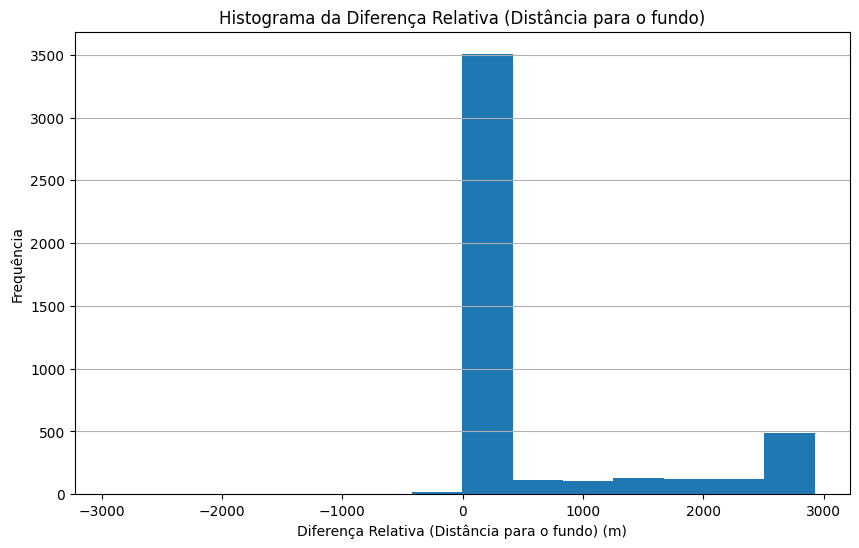

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df['DEPT_BDEP_DIFF'], bins=n_classes)
plt.title('Histograma da Diferença Relativa (Distância para o fundo)')
plt.xlabel('Diferença Relativa (Distância para o fundo) (m)')
plt.ylabel('Frequência')
plt.grid(axis='y')
plt.show()

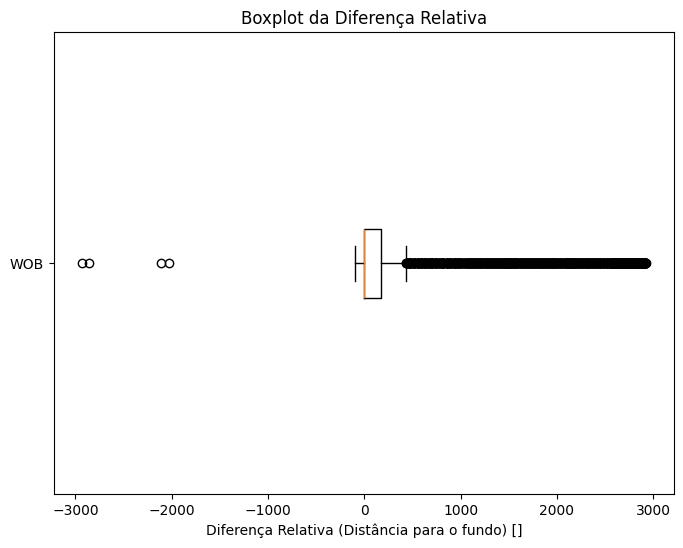

In [ ]:
plt.figure(figsize=(8, 6))
plt.boxplot(df['DEPT_BDEP_DIFF'].dropna(), vert=False, showfliers=True, tick_labels=['WOB'])
plt.title('Boxplot da Diferença Relativa')
plt.xlabel('Diferença Relativa (Distância para o fundo) []')
plt.show()

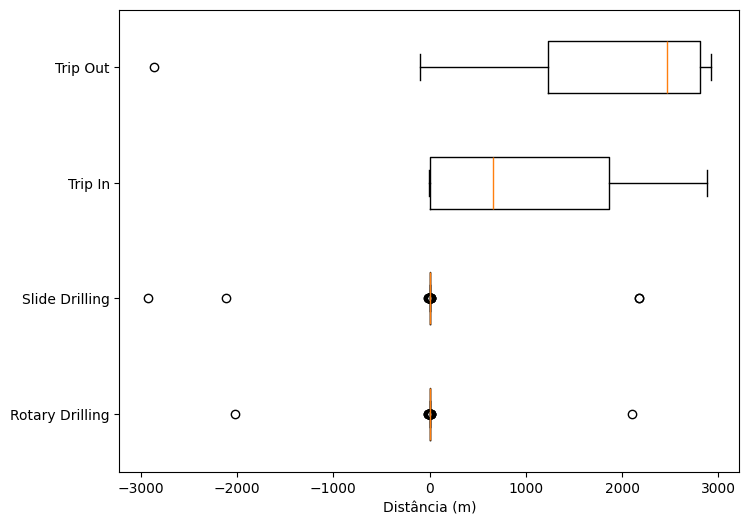

In [ ]:
# Distribuição da variável DEPT_BDEP_DIFF por classes de interesse
variable_selection = 'DEPT_BDEP_DIFF'

data_rotary = df[variable_selection][df['OPERATION']=='Rotary Drilling'].dropna()
data_slide = df[variable_selection][df['OPERATION']=='Slide Drilling'].dropna()
data_tripin = df[variable_selection][df['OPERATION']=='Trip In'].dropna()
data_tripout = df[variable_selection][df['OPERATION']=='Trip Out'].dropna()


plt.figure(figsize=(8, 6))
plt.boxplot([data_rotary, data_slide, data_tripin, data_tripout], vert=False, showfliers=True,
            tick_labels=['Rotary Drilling', 'Slide Drilling', 'Trip In', 'Trip Out'])
plt.xlabel('Distância (m)')
plt.show()

### Peso Sobre a Broca (`WOB`)

In [ ]:
# Cálculo de estatísticas básicas da variável WOB
wob_min = df['WOB'].min()
wob_max = df['WOB'].max()
wob_range = wob_max - wob_min

print(f"\nEstatísticas Básicas:")
print(f"├─ Mínimo: {wob_min:.2f}")
print(f"├─ Máximo: {wob_max:.2f}")
print(f"└─ Amplitude: {wob_range:.2f}")


Estatísticas Básicas:
├─ Mínimo: -10.00
├─ Máximo: 117.33
└─ Amplitude: 127.33


In [ ]:
# Calcula número de classes usando a Regra de Sturges: K = 1 + 3.322 * log₁₀(n)
n_classes = int(np.ceil(1 + 3.322 * np.log10(len(df))))
print(f"Número de classes (Regra de Sturges): {n_classes}")

Número de classes (Regra de Sturges): 14


In [ ]:
# Calcula amplitude de cada classe: h = Amplitude_total / K
class_width = wob_range / n_classes
print(f"Amplitude de classe: {class_width:.2f}")

Amplitude de classe: 9.10


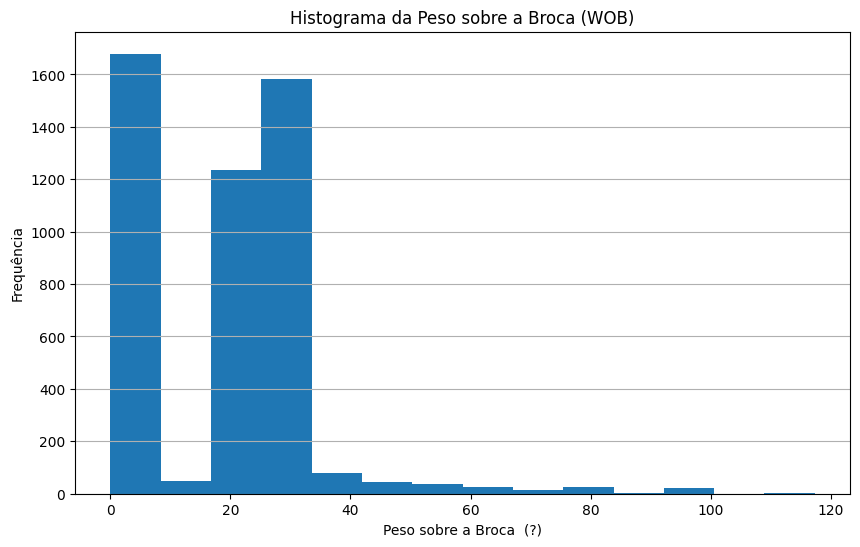

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df['WOB'], bins=n_classes)
plt.title('Histograma da Peso sobre a Broca (WOB)')
plt.xlabel('Peso sobre a Broca  (?)')
plt.ylabel('Frequência')
plt.grid(axis='y')
plt.show()

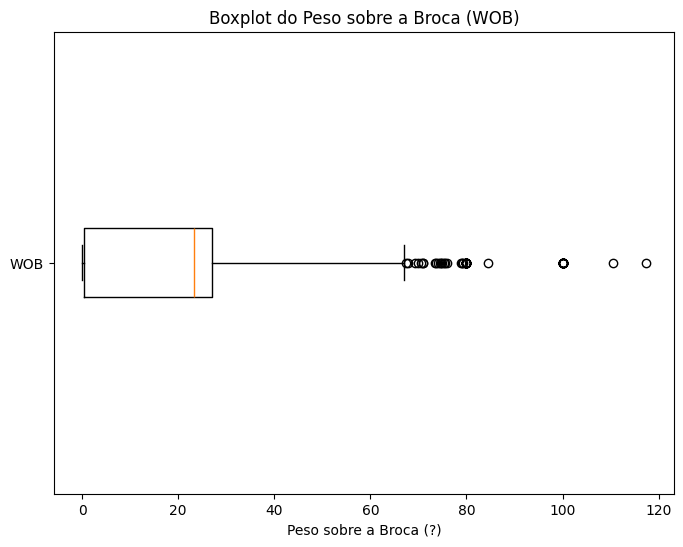

In [ ]:
plt.figure(figsize=(8, 6))
plt.boxplot(df['WOB'].dropna(), vert=False, showfliers=True, tick_labels=['WOB'])
plt.title('Boxplot do Peso sobre a Broca (WOB)')
plt.xlabel('Peso sobre a Broca (?)')
plt.show()

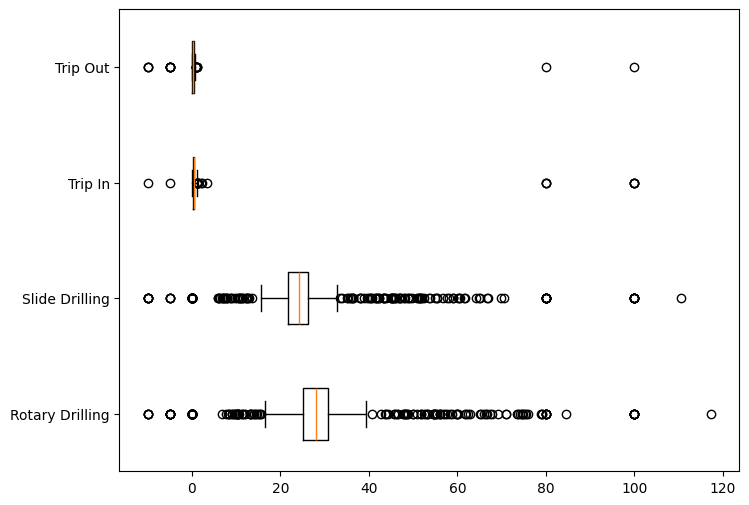

In [ ]:
# Distribuição da variável SPP por classes de interesse
variable_selection = 'WOB'

data_rotary = df[variable_selection][df['OPERATION']=='Rotary Drilling'].dropna()
data_slide = df[variable_selection][df['OPERATION']=='Slide Drilling'].dropna()
data_tripin = df[variable_selection][df['OPERATION']=='Trip In'].dropna()
data_tripout = df[variable_selection][df['OPERATION']=='Trip Out'].dropna()

plt.figure(figsize=(8, 6))
plt.boxplot([data_rotary, data_slide, data_tripin, data_tripout], vert=False, showfliers=True,
            tick_labels=['Rotary Drilling', 'Slide Drilling', 'Trip In', 'Trip Out'])
plt.show()

In [ ]:
wob_data = np.array(df['WOB'].dropna().values)

std_temp = np.std(wob_data, ddof=1)  # Desvio padrão amostral
var_temp = np.var(wob_data, ddof=1)  # Variância amostral
range_temp = np.ptp(wob_data)  # Range (Peak-to-Peak)
iqr_temp = stats.iqr(wob_data)  # Intervalo interquartílico
cv_temp = (std_temp / abs(np.mean(wob_data))) * 100  # Coeficiente de variação

print("MEDIDAS DE DISPERSÃO - Profundidade (m)")
print("="*60)
print(f"Desvio Padrão: {std_temp:.4f} (m)")
print(f"Variância: {var_temp:.4f} (m²)")
print(f"Amplitude (Range): {range_temp:.4f} (m)")
print(f"IQR (Q3-Q1): {iqr_temp:.4f} (m)")
print(f"Coeficiente de Variação: {cv_temp:.4f} %")

MEDIDAS DE DISPERSÃO - Profundidade (m)
Desvio Padrão: 15.8732 (m)
Variância: 251.9570 (m²)
Amplitude (Range): 127.3326 (m)
IQR (Q3-Q1): 26.6432 (m)
Coeficiente de Variação: 86.7197 %


### Peso no Gancho (`HOOK_LOAD`)

In [ ]:
# Cálculo de estatísticas básicas da variável WOB
hook_load_min = df['HOOK_LOAD'].min()
hook_load_max = df['HOOK_LOAD'].max()
hook_load_range = hook_load_max - hook_load_min

print(f"\nEstatísticas Básicas:")
print(f"├─ Mínimo: {hook_load_min:.2f}")
print(f"├─ Máximo: {hook_load_max:.2f}")
print(f"└─ Amplitude: {hook_load_range:.2f}")


Estatísticas Básicas:
├─ Mínimo: -50.00
├─ Máximo: 911.88
└─ Amplitude: 961.88


In [ ]:
# Calcula número de classes usando a Regra de Sturges: K = 1 + 3.322 * log₁₀(n)
n_classes = int(np.ceil(1 + 3.322 * np.log10(len(df))))
print(f"Número de classes (Regra de Sturges): {n_classes}")

Número de classes (Regra de Sturges): 14


In [ ]:
# Calcula amplitude de cada classe: h = Amplitude_total / K
class_width = hook_load_range / n_classes
print(f"Amplitude de classe: {class_width:.2f}")

Amplitude de classe: 68.71


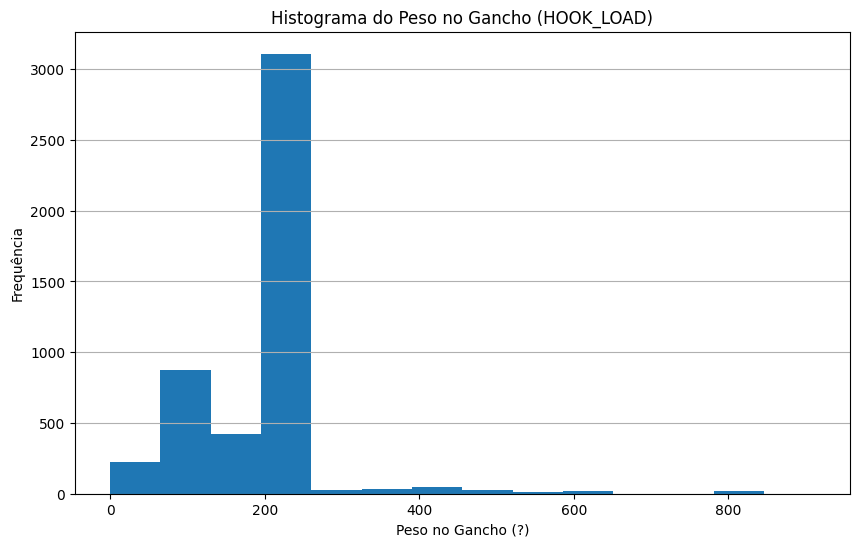

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df['HOOK_LOAD'], bins=n_classes)
plt.title('Histograma do Peso no Gancho (HOOK_LOAD)')
plt.xlabel('Peso no Gancho (?)')
plt.ylabel('Frequência')
plt.grid(axis='y')
plt.show()

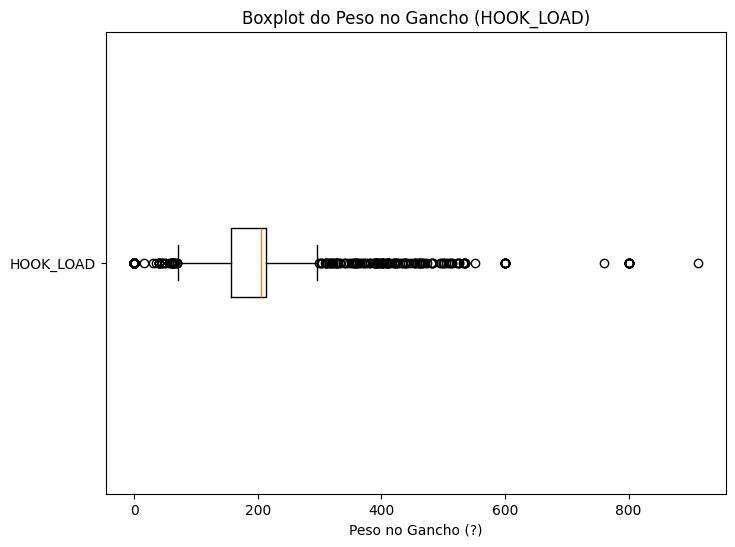

In [ ]:
plt.figure(figsize=(8, 6))
plt.boxplot(df['HOOK_LOAD'].dropna(), vert=False, showfliers=True, tick_labels=['HOOK_LOAD'])
plt.title('Boxplot do Peso no Gancho (HOOK_LOAD)')
plt.xlabel('Peso no Gancho (?)')
plt.show()

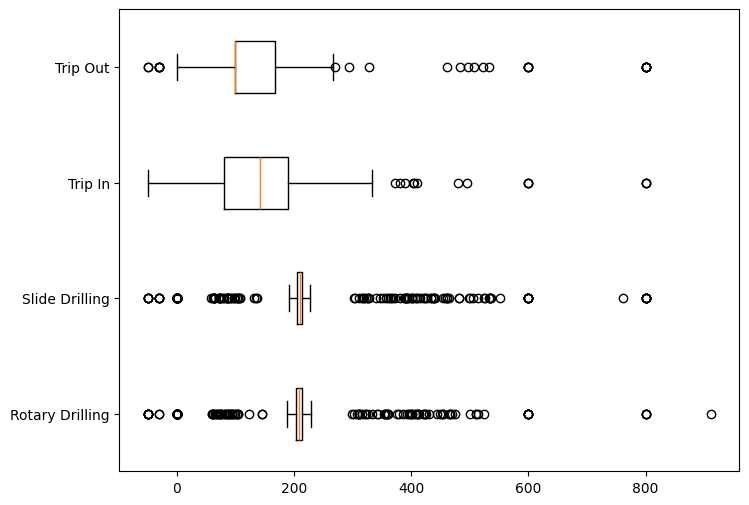

In [ ]:
# Distribuição da variável HOOK_LOAD por classes de interesse
variable_selection = 'HOOK_LOAD'

data_rotary = df[variable_selection][df['OPERATION']=='Rotary Drilling'].dropna()
data_slide = df[variable_selection][df['OPERATION']=='Slide Drilling'].dropna()
data_tripin = df[variable_selection][df['OPERATION']=='Trip In'].dropna()
data_tripout = df[variable_selection][df['OPERATION']=='Trip Out'].dropna()

plt.figure(figsize=(8, 6))
plt.boxplot([data_rotary, data_slide, data_tripin, data_tripout], vert=False, showfliers=True,
            tick_labels=['Rotary Drilling', 'Slide Drilling', 'Trip In', 'Trip Out'])
plt.show()

### Pressão de *Standpipe* (`SPP`)

**Observação:** Ausencia das unidades.

In [ ]:
# Calcula estatísticas básicas da variável SPP
spp_min = df['SPP'].min()
spp_max = df['SPP'].max()
spp_range = spp_max - spp_min

print(f"\nEstatísticas Básicas:")
print(f"├─ Mínimo: {spp_min:.2f}")
print(f"├─ Máximo: {spp_max:.2f}")
print(f"└─ Amplitude: {spp_range:.2f}")


Estatísticas Básicas:
├─ Mínimo: -200.00
├─ Máximo: 22862.91
└─ Amplitude: 23062.91


In [ ]:
# Calcula amplitude da classe: h = Amplitude_total / K
spp_class_width = spp_range / n_classes
print(f"Amplitude de classe: {spp_class_width:.2f}")

Amplitude de classe: 1647.35


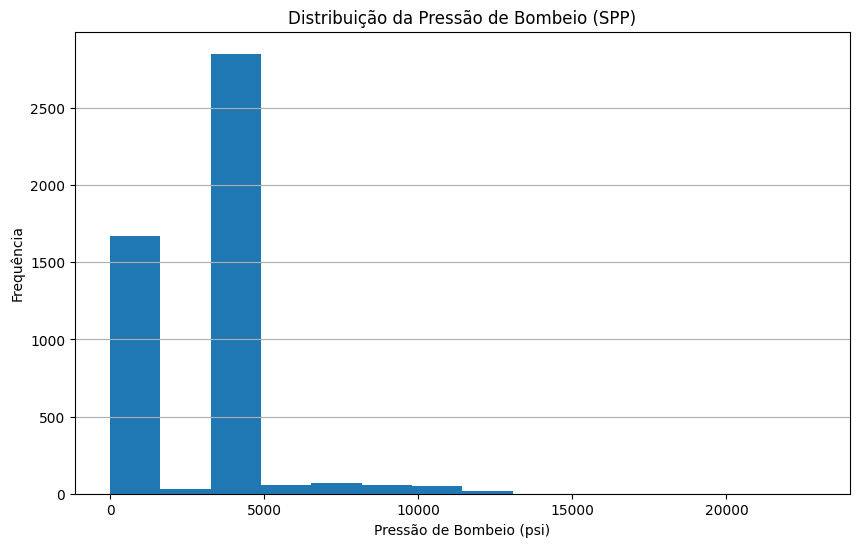

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df['SPP'].dropna(), bins=n_classes)
plt.title('Distribuição da Pressão de Bombeio (SPP)')
plt.xlabel('Pressão de Bombeio (psi)')
plt.ylabel('Frequência')
plt.grid(axis='y')
plt.show()

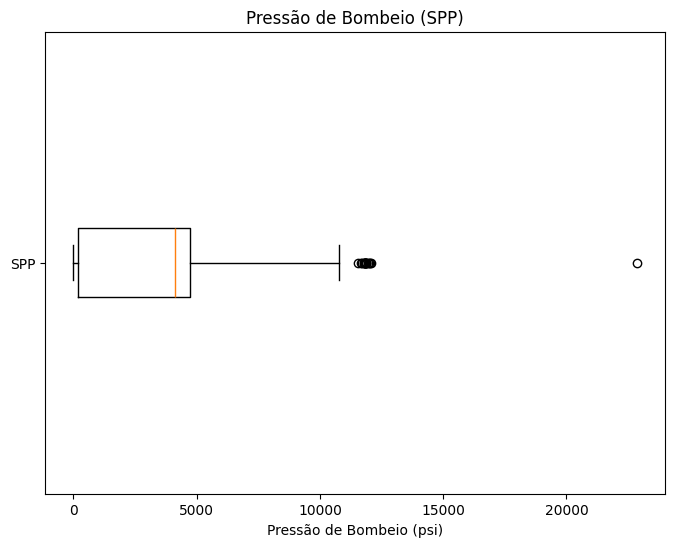

In [ ]:
plt.figure(figsize=(8, 6))
plt.boxplot(df['SPP'].dropna(), vert=False, showfliers=True, tick_labels=['SPP'])
plt.title('Pressão de Bombeio (SPP)')
plt.xlabel('Pressão de Bombeio (psi)')
plt.show()

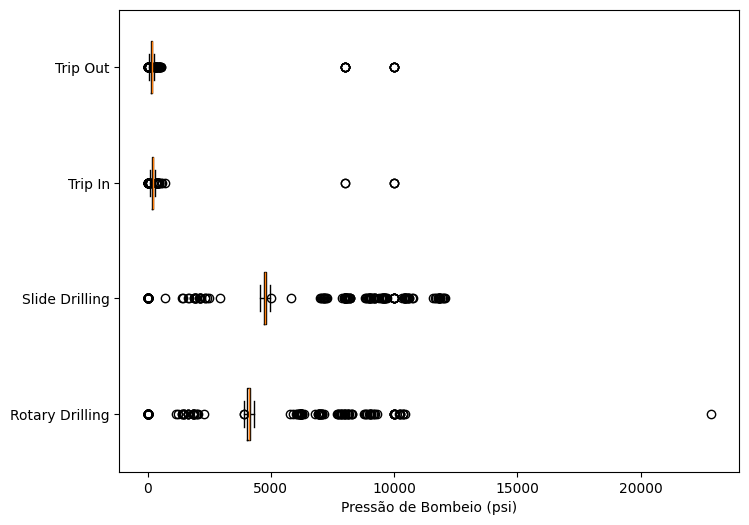

In [ ]:
# Distribuição da variável SPP por classes de interesse
variable_selection = 'SPP'

data_rotary = df[variable_selection][df['OPERATION']=='Rotary Drilling'].dropna()
data_slide = df[variable_selection][df['OPERATION']=='Slide Drilling'].dropna()
data_tripin = df[variable_selection][df['OPERATION']=='Trip In'].dropna()
data_tripout = df[variable_selection][df['OPERATION']=='Trip Out'].dropna()


plt.figure(figsize=(8, 6))
plt.boxplot([data_rotary, data_slide, data_tripin, data_tripout], vert=False, showfliers=True,
            tick_labels=['Rotary Drilling', 'Slide Drilling', 'Trip In', 'Trip Out'])
plt.xlabel('Pressão de Bombeio (psi)')
plt.show()

### Vazão (`FLOW_RATE`)

**Observação:** Unidades

In [ ]:
# Cálculo de estatísticas básicas da variável FLOW_RATE
flow_rate_min = df['FLOW_RATE'].min()
flow_rate_max = df['FLOW_RATE'].max()
flow_rate_range = flow_rate_max - flow_rate_min

print(f"\nEstatísticas Básicas:")
print(f"├─ Mínimo: {flow_rate_min:.2f}")
print(f"├─ Máximo: {flow_rate_max:.2f}")
print(f"└─ Amplitude: {flow_rate_range:.2f}")


Estatísticas Básicas:
├─ Mínimo: -100.00
├─ Máximo: 4297.62
└─ Amplitude: 4397.62


In [ ]:
# Calcula amplitude da classe: h = Amplitude_total / K
flow_rate_class_width = flow_rate_range / n_classes
print(f"Amplitude de classe: {flow_rate_class_width:.2f}")

Amplitude de classe: 314.12


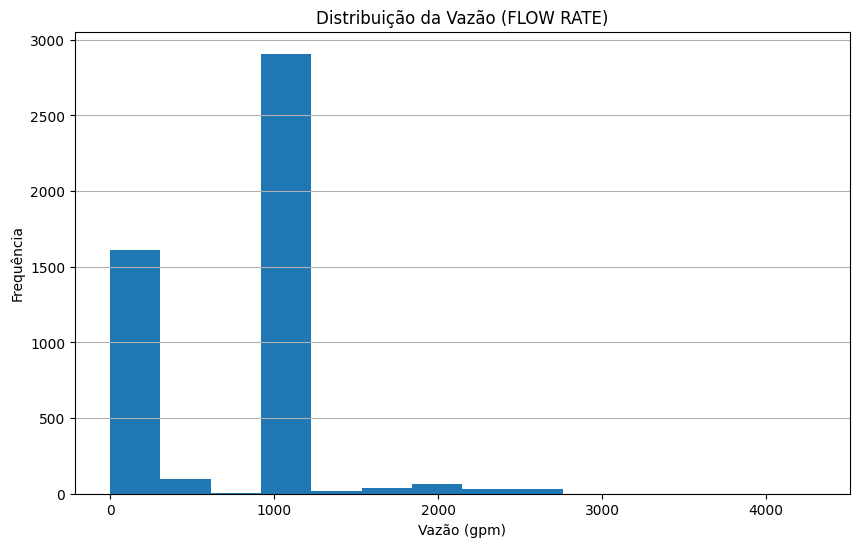

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df['FLOW_RATE'].dropna(), bins=n_classes)
plt.title('Distribuição da Vazão (FLOW RATE)')
plt.xlabel('Vazão (gpm)')
plt.ylabel('Frequência')
plt.grid(axis='y')
plt.show()

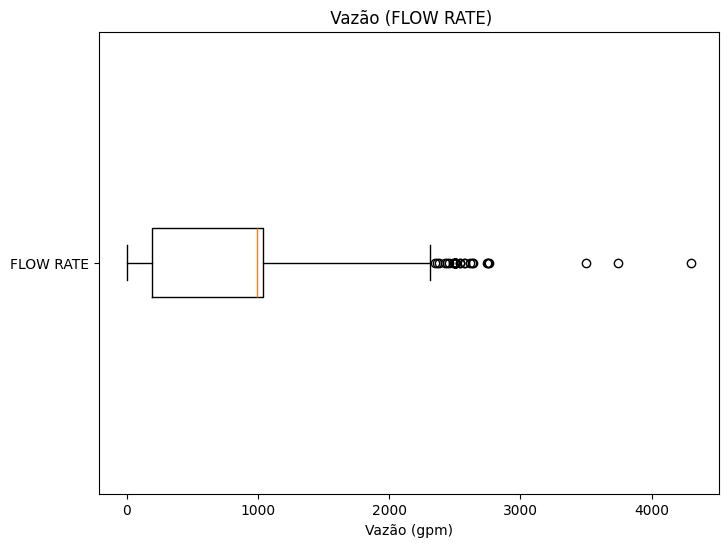

In [ ]:
plt.figure(figsize=(8, 6))
plt.boxplot(df['FLOW_RATE'].dropna(), vert=False, showfliers=True, tick_labels=['FLOW RATE'])
plt.title(' Vazão (FLOW RATE)')
plt.xlabel('Vazão (gpm)')
plt.show()

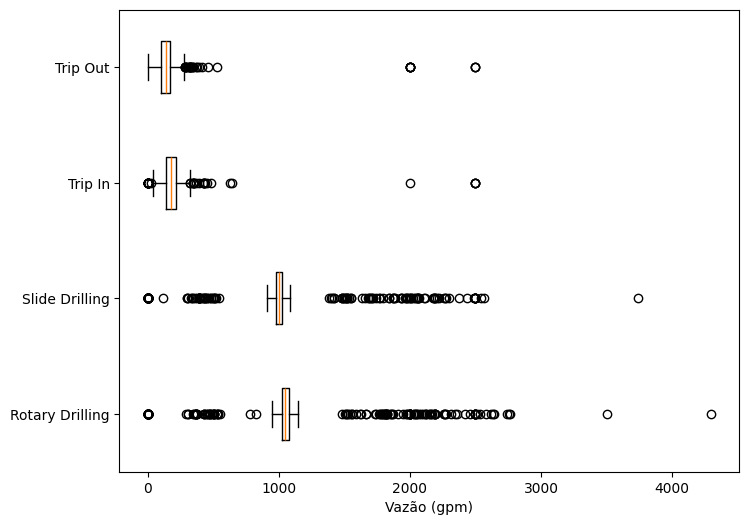

In [ ]:
# Distribuição da variável FLOW_RATE por classes de interesse
variable_selection = 'FLOW_RATE'

data_rotary = df[variable_selection][df['OPERATION']=='Rotary Drilling'].dropna()
data_slide = df[variable_selection][df['OPERATION']=='Slide Drilling'].dropna()
data_tripin = df[variable_selection][df['OPERATION']=='Trip In'].dropna()
data_tripout = df[variable_selection][df['OPERATION']=='Trip Out'].dropna()


plt.figure(figsize=(8, 6))
plt.boxplot([data_rotary, data_slide, data_tripin, data_tripout], vert=False, showfliers=True,
            tick_labels=['Rotary Drilling', 'Slide Drilling', 'Trip In', 'Trip Out'])
plt.xlabel('Vazão (gpm)')
plt.show()

### Operação (`OPERATION`)

Por fim, vamos entender um pouco mais sobre a nossa variável categórica, o `target` do nosso estudo.

In [ ]:
# Exibe os valores únicos da coluna 'operational_status'
print(f"Status Operacional: {df['OPERATION'].unique()}")

Status Operacional: ['Rotary Drilling' 'Slide Drilling' 'Trip Out' 'Trip In']


Começamos identificando quais classes estão disponíveis nos dados, fazendo uma análise dos valores únicos associados a ela, esses serão as possíveis sáidas do nosso modelo de classificação. **Foram identificadas 4 classes!**

Vamos fazer uma avalição agora quanto a distribuição dessas classes, para entedermos o balanceamento delas.

In [ ]:
df['OPERATION'].value_counts()

,count
OPERATION,
Slide Drilling,1759
Rotary Drilling,1631
Trip Out,883
Trip In,727


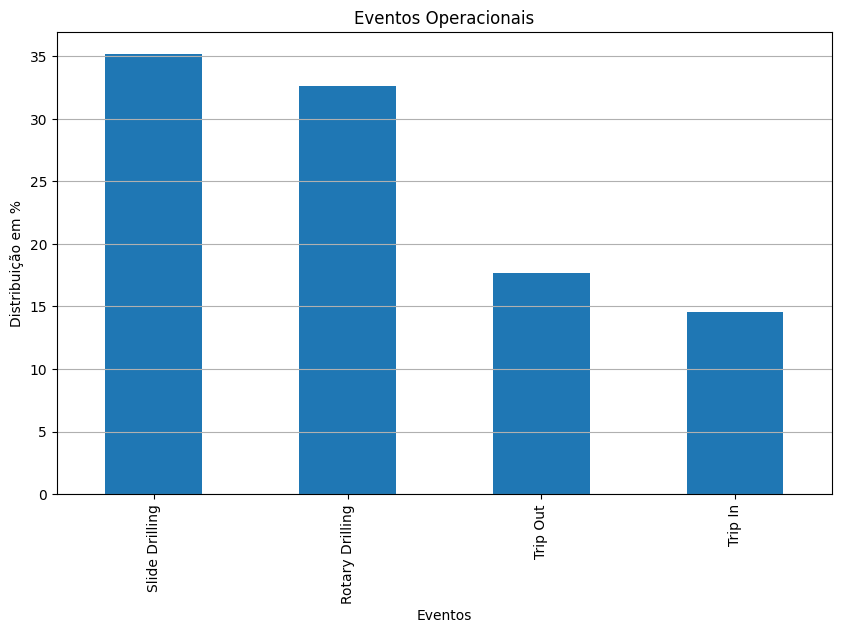

In [ ]:
"""
Gráfico de Barras - Eventos Operacionais
-----------------------------------------
Visualização da frequência de cada tipo de evento operacional.
"""

# Prepara dados para visualização
operational_status = (df['OPERATION'].value_counts()/len(df['OPERATION']))*100
operational_status.columns = ['OPERATION', 'val']

# Cria gráfico de barras
plt.figure(figsize=(10, 6))
operational_status.plot.bar(x='OPERATION', y='val', legend=False)
plt.title('Eventos Operacionais')
plt.xlabel('Eventos')
plt.ylabel('Distribuição em %')
plt.grid(axis='y')
plt.show()

Aqui notação que as os pares de classes (Drilling e Trip), apresentam quantidades relativamente próximas, o que nos permite dizer, em um primeiro momento, que há um certo balanceamento entre as classes, respeitando um possível volume de ocorrência durante a perfuração de um poço.

## Análise de Valores Negativos

In [ ]:
vars_continuas = ['DEPT_BDEP_DIFF','WOB','HOOK_LOAD','SPP','FLOW_RATE']

# Verificação de negativos
negativos = (df[vars_continuas] < 0).any()
negativos

,0
DEPT_BDEP_DIFF,True
WOB,True
HOOK_LOAD,True
SPP,True
FLOW_RATE,True


In [ ]:
# Contagem total de valores negativos por variável
contagem_negativos = (df[vars_continuas] < 0).sum()
contagem_negativos

,0
DEPT_BDEP_DIFF,1512
WOB,33
HOOK_LOAD,32
SPP,34
FLOW_RATE,36


In [ ]:
# Filtra todas as linhas que contenham pelo menos 1 negativo
linhas_com_negativos = df[df[vars_continuas].lt(0).any(axis=1)]
linhas_com_negativos.head()

,DEPT_BDEP_DIFF,WOB,HOOK_LOAD,SPP,FLOW_RATE,TIMESTAMP,OPERATION
1,-0.504954,32.854322,191.493554,4135.676653,1111.331174,2024-06-15 06:00:10,Rotary Drilling
12,-1.070602,27.964524,198.589116,4085.145978,1796.015724,2024-06-15 06:02:00,Rotary Drilling
13,-0.623206,75.321414,203.634689,4061.430739,1040.024582,2024-06-15 06:02:10,Rotary Drilling
15,-0.362607,31.369556,197.390523,3965.836932,1034.474897,2024-06-15 06:02:30,Rotary Drilling
16,-0.547990,30.077027,203.230657,3973.507779,2500.000000,2024-06-15 06:02:40,Rotary Drilling


In [ ]:
proporcao_negativos = (df[vars_continuas] < 0).mean() * 100
proporcao_negativos.round(3)

,0
DEPT_BDEP_DIFF,30.24
WOB,0.66
HOOK_LOAD,0.64
SPP,0.68
FLOW_RATE,0.72


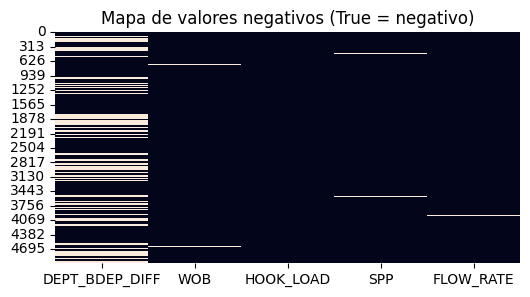

In [ ]:
plt.figure(figsize=(6,3))
sns.heatmap(df[vars_continuas].lt(0), cbar=False)
plt.title("Mapa de valores negativos (True = negativo)")
plt.show()

In [ ]:
neg_dept = df[df["DEPT_BDEP_DIFF"] < 0]["DEPT_BDEP_DIFF"]
neg_dept.describe()

,DEPT_BDEP_DIFF
count,1512.000000
mean,-7.120157
std,129.301838
min,-2929.944461
25%,-0.592449
50%,-0.341797
75%,-0.161779
max,-0.000012


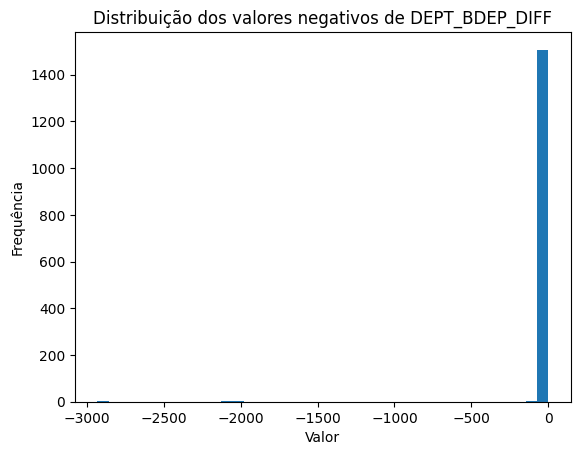

In [ ]:
plt.hist(df.loc[df["DEPT_BDEP_DIFF"] < 0, "DEPT_BDEP_DIFF"], bins=40)
plt.title("Distribuição dos valores negativos de DEPT_BDEP_DIFF")
plt.xlabel("Valor")
plt.ylabel("Frequência")
plt.show()

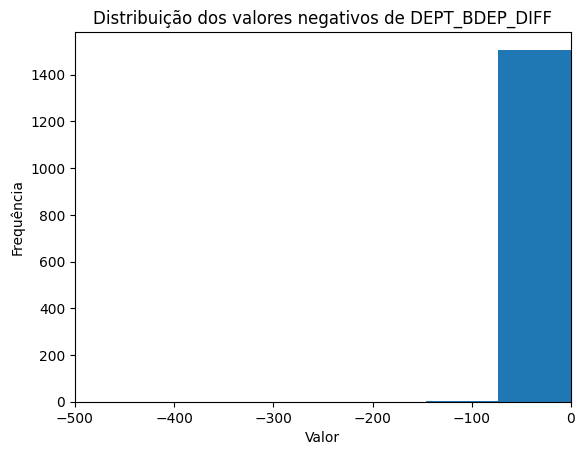

In [ ]:
plt.hist(df.loc[df["DEPT_BDEP_DIFF"] < 0, "DEPT_BDEP_DIFF"], bins=40)
plt.title("Distribuição dos valores negativos de DEPT_BDEP_DIFF")
plt.xlabel("Valor")
plt.ylabel("Frequência")
plt.xlim(-500, 0)   # ajuste conforme quiser
plt.show()

Aqui nós percebemos que boa parte dos dados negativos são próximos a zero, além disso nós sabemos que esses valores não podem ser negativos, ao que tudo nos indica serem problemas de medição ou rúidos associados, desta maneira, vamos transformar esses valores em zero.

In [ ]:
# Substituir valores negativos por 0
df["DEPT_BDEP_DIFF"] = df["DEPT_BDEP_DIFF"].clip(lower=0)

# Verificar resultado
df["DEPT_BDEP_DIFF"].describe()


,DEPT_BDEP_DIFF
count,4608.000000
mean,492.854698
std,953.688843
min,0.000000
25%,0.000000
50%,0.333349
75%,173.786322
max,2924.088522


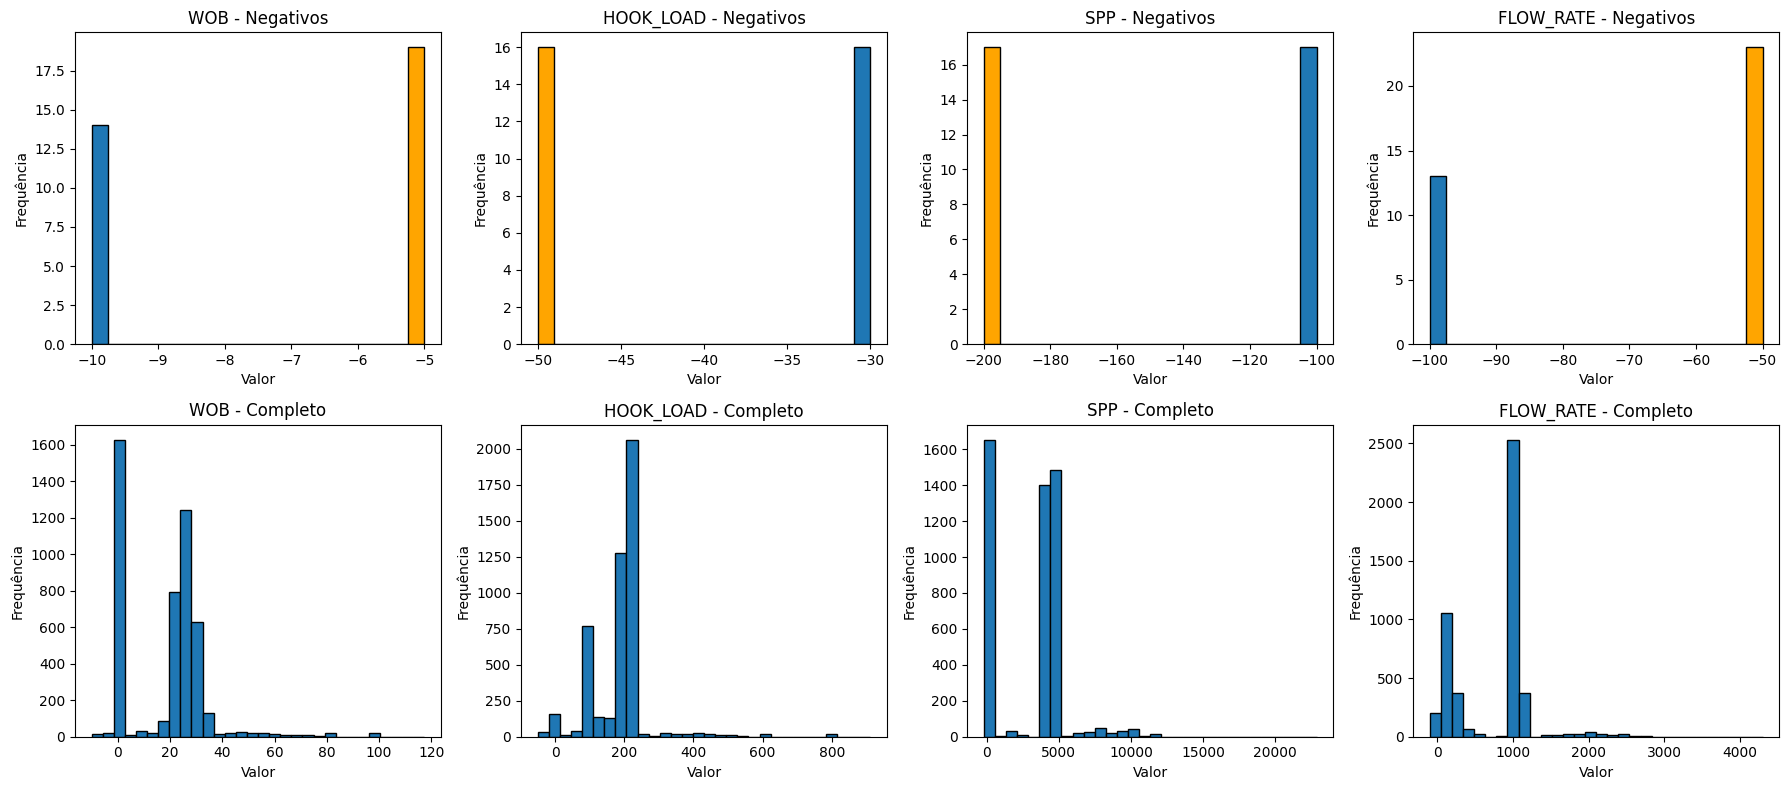

In [ ]:
vars_neg = ["WOB", "HOOK_LOAD", "SPP", "FLOW_RATE"]
fig, axes = plt.subplots(2, len(vars_neg), figsize=(18, 8))

for i, col in enumerate(vars_neg):
    ax_neg = axes[0, i]
    series_neg = df[df[col] < 0][col]
    if len(series_neg) == 0:
        ax_neg.set_title(f"{col} (sem negativos)")
        ax_neg.axis("off")
    else:
        counts, bins, patches = ax_neg.hist(series_neg, bins=20, edgecolor="black")
        max_idx = counts.argmax()
        patches[max_idx].set_facecolor("orange")
        ax_neg.set_title(f"{col} - Negativos")
        ax_neg.set_xlabel("Valor")
        ax_neg.set_ylabel("Frequência")
    ax_full = axes[1, i]
    ax_full.hist(df[col], bins=30, edgecolor="black")
    ax_full.set_title(f"{col} - Completo")
    ax_full.set_xlabel("Valor")
    ax_full.set_ylabel("Frequência")

plt.tight_layout()
plt.show()

In [ ]:
vars_neg = ["WOB", "HOOK_LOAD", "SPP", "FLOW_RATE"]

for col in vars_neg:
    df[col] = df[col].apply(lambda x: 0 if x < 0 else x)
df[vars_neg].describe()


,WOB,HOOK_LOAD,SPP,FLOW_RATE
count,4797.000000,4815.000000,4802.000000,4810.000000
mean,18.352957,187.223499,3142.142729,755.285559
std,15.804110,87.458649,2400.794336,497.410033
min,0.000000,0.000000,0.000000,0.000000
25%,0.447594,156.128801,205.929120,187.892560
50%,23.226889,205.696491,4102.105439,994.801906
75%,27.090838,212.753512,4744.181668,1038.686936
max,117.332562,911.877527,22862.912806,4297.622598


O mesmo foi adotado para as outras variáveis, além de não ser possível termos esses valores negativos, há uma baixa quantidade indicando pequeno ruídos, vamos tratar transformando em zero.

## Análise de Outliers e Valores Faltantes

### Valores Faltantes (NaN/Nulos)

In [ ]:
dataset_size_without_nans = len(df.dropna())
dataset_size_with_nans = len(df)
nans_percentage = ((dataset_size_with_nans - dataset_size_without_nans) / dataset_size_with_nans) * 100
nans_percentage

21.22

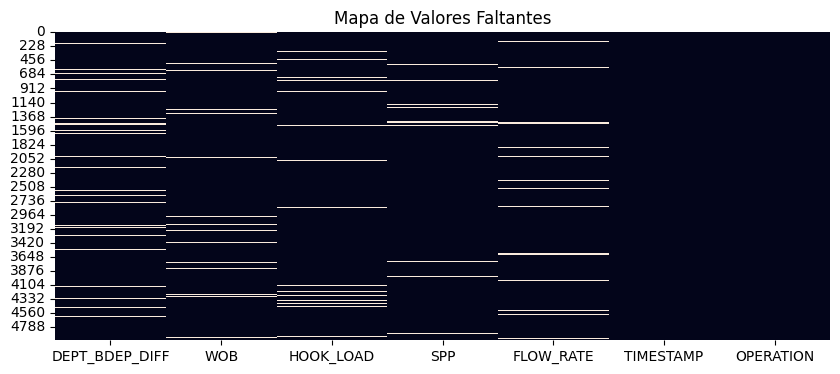

In [ ]:
plt.figure(figsize=(10,4))
sns.heatmap(df.isna(), cbar=False)
plt.title("Mapa de Valores Faltantes")
plt.show()

Nesse gráfico podemos notar os *Index* associados com os NaNs presentes no nosso dataframe. Nela não há janelas de dados faltantes extensas (sequência de dados faltantes), além disso, são poucos os momentos em que temos mais de uma variável com dados faltando na mesma linha (*Index*).

Isso nos indica que podemos tentar tratar esses dados usando diferentes técnicas, pois como não temos um volume de dados muito grande, simplesmente removê-los iria arretar em uma **perda de aproximadamente 21 % dos dados**, uma redução que pode impactar o aprendizado do classificador.

**Método adotado**: Por estarmos trabalhando com valores de uma série temporal, e que não apresenta um alto volume de dados faltantes ou janelas longas, seguiremos um método mais simples de interpolação linear.

In [ ]:
df_filled = df.interpolate(method="linear").copy()

# Verificar se ainda há NaN
df_filled.isna().sum()

/tmp/ipython-input-1472144109.py:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_filled = df.interpolate(method="linear").copy()


,0
DEPT_BDEP_DIFF,0
WOB,0
HOOK_LOAD,0
SPP,0
FLOW_RATE,0
TIMESTAMP,0
OPERATION,0


**Não há mais Nan/Null em nosso dados!**

### Outliers

A remoção de outliers é essencial no desenvolvimento de classificadores porque valores extremos geralmente representam ruídos de sensores, falhas de medição ou eventos não relacionados ao comportamento real das operações. Esses pontos distorcem distribuições, prejudicam métodos de normalização e afetam a separabilidade entre as classes, levando o modelo a aprender padrões falsos e a reduzir sua capacidade de generalização. Assim, eliminar outliers melhora a qualidade dos dados e aumenta a robustez e a precisão do classificador.

Vamos usar duas abordagens:

1.   Método do IQR (Interquartile Range)
2.   Desvio-padrão (±3σ e ±4σ)

Antes de iniciar a avaliação desses outliers é importante buscar entender e reconhecer junto aos especialistas, os perfis e padrões esperados, observando também a relação entre as variáveis.

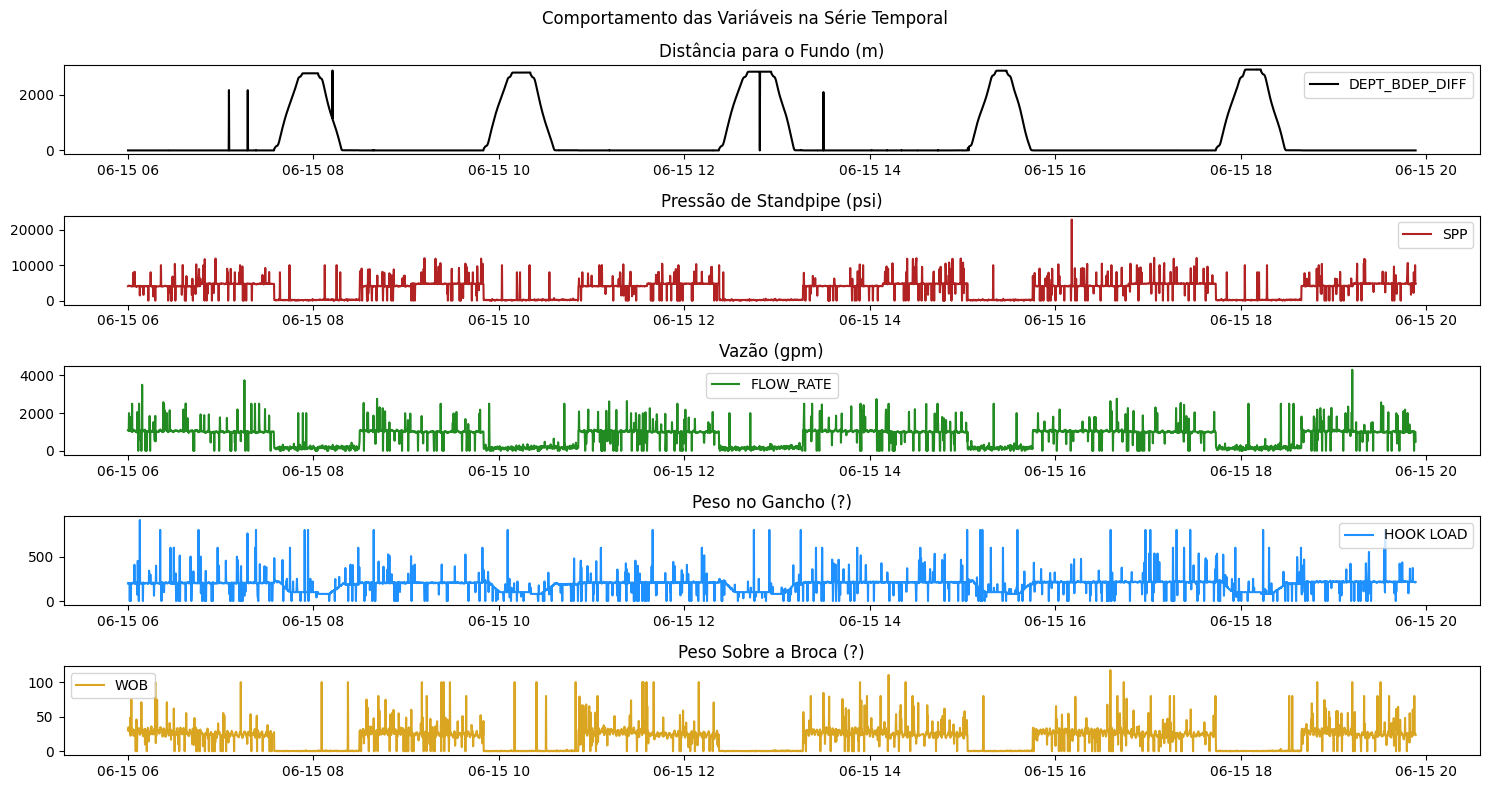

In [ ]:
fig, axs = plt.subplots(nrows=5, ncols=1, figsize=(15, 8))
fig.suptitle("Comportamento das Variáveis na Série Temporal")

axs[0].plot( df_filled['TIMESTAMP'], df_filled['DEPT_BDEP_DIFF'], color="black", label="DEPT_BDEP_DIFF")
axs[0].set_title("Distância para o Fundo (m)")
axs[0].legend()

axs[1].plot( df_filled['TIMESTAMP'],df_filled['SPP'], color="firebrick", label="SPP")
axs[1].set_title("Pressão de Standpipe (psi)")
axs[1].legend()

axs[2].plot( df_filled['TIMESTAMP'],df_filled['FLOW_RATE'], color="forestgreen", label="FLOW_RATE")
axs[2].set_title("Vazão (gpm)")
axs[2].legend()

axs[3].plot(df_filled['TIMESTAMP'], df_filled['HOOK_LOAD'], label="HOOK LOAD", color="dodgerblue")
axs[3].set_title("Peso no Gancho (?)")
axs[3].legend()

axs[4].plot( df_filled['TIMESTAMP'], df_filled['WOB'], label="WOB", color="goldenrod")
axs[4].set_title("Peso Sobre a Broca (?)")
axs[4].legend()

plt.tight_layout()
plt.show()

In [ ]:
# Funções auxiliares:

def outliers_iqr(series):
    """Retorna booleanos indicando outliers usando o método do IQR."""
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return (series < lower) | (series > upper), lower, upper

def outliers_std(series, k=3):
    """Retorna outliers usando média ± k * desvio-padrão."""
    mean = series.mean()
    std = series.std()
    lower = mean - k * std
    upper = mean + k * std
    return (series < lower) | (series > upper), lower, upper


In [ ]:
summary = []

for col in vars_continuas:

    # IQR
    out_iqr, li_iqr, ls_iqr = outliers_iqr(df_filled[col])

    # 3σ
    out_3std, li_3, ls_3 = outliers_std(df_filled[col], k=3)

    # 4σ
    out_4std, li_4, ls_4 = outliers_std(df_filled[col], k=4)

    summary.append({
        "Variável": col,
        "Outliers IQR (%)": out_iqr.mean() * 100,
        "Outliers 3σ (%)": out_3std.mean() * 100,
        "Outliers 4σ (%)": out_4std.mean() * 100
    })

df_outlier_summary = pd.DataFrame(summary)
df_outlier_summary


,Variável,Outliers IQR (%),Outliers 3σ (%),Outliers 4σ (%)
0,DEPT_BDEP_DIFF,23.30,0.00,0.00
1,WOB,1.30,1.40,0.50
2,HOOK_LOAD,8.16,1.74,1.00
3,SPP,0.34,0.74,0.02
4,FLOW_RATE,0.82,1.00,0.12


Em uma primeira análise podemos perceber que usando IQR temos uma boa quantidade de pontos que podem ser considerado Outliers, enquanto usando desvio padrão (principalmente quatro) pegamos uma quantidade bem menor.

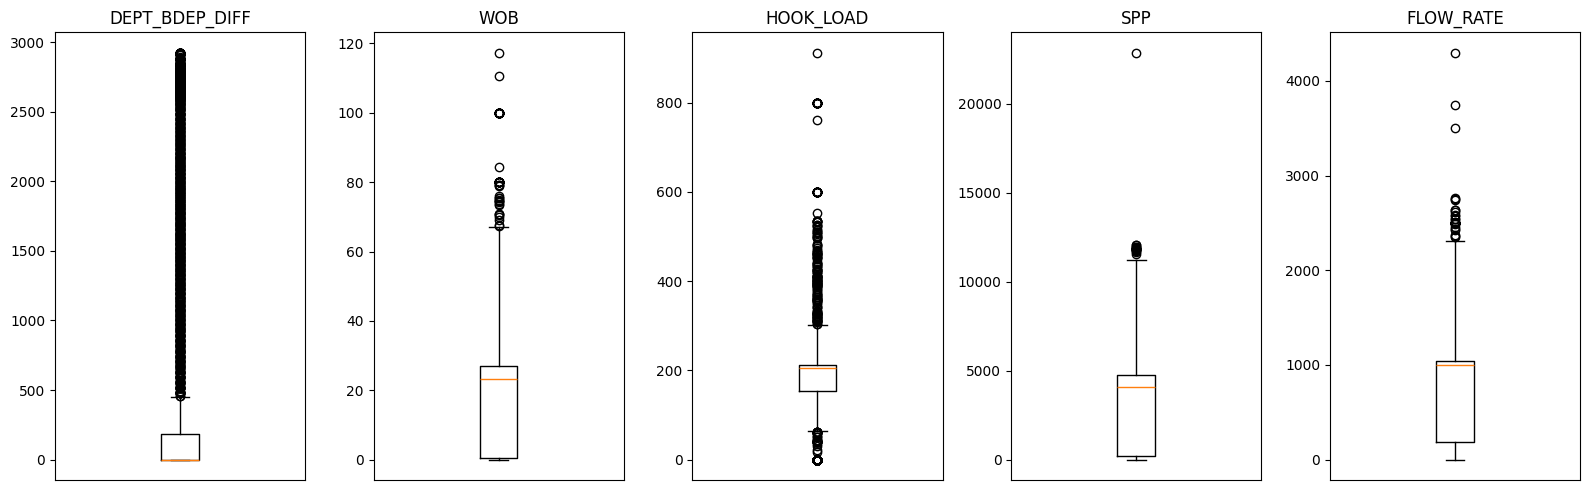

In [ ]:
plt.figure(figsize=(16, 5))

for i, col in enumerate(vars_continuas):
    plt.subplot(1, len(vars_continuas), i + 1)
    plt.boxplot(df_filled[col].dropna())
    plt.title(col)
    plt.xticks([])

plt.tight_layout()
plt.show()

Olhando os Boxplot, principalmente da [distribuição de DEPT_BDEP_DIFF por classe operacional](https://colab.research.google.com/drive/1_bhFba7JAvx9RzB-I1EV7Wwu2gdN_nLk#scrollTo=B2-stRrjFEH7&line=13&uniqifier=1), fica claro que **uma classe** pode estar sendo destacada como potencial *outlier*.

 Neste caso, com  técnica de remoção por IQR, perderíamos muitos dados correspondentes a operação, ou seja, aumentando ainda mais o desbalanceamento entre as classes da respectiva desta variável.

 Vamos seguir nossa análise para o desvio padrão.

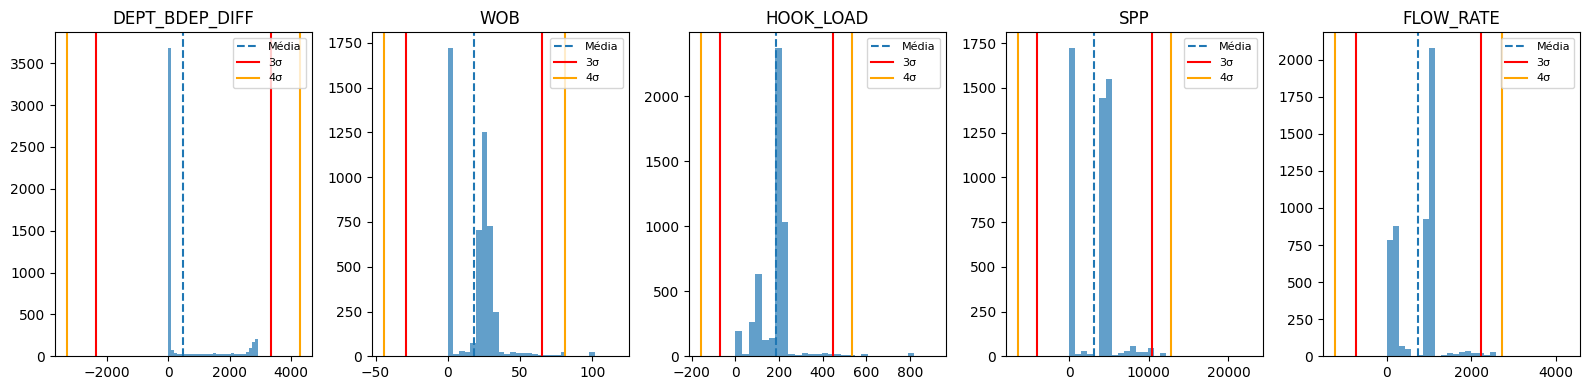

In [ ]:
fig, axes = plt.subplots(1, len(vars_continuas), figsize=(16, 4))

for i, col in enumerate(vars_continuas):

    ax = axes[i]

    series = df_filled[col].dropna()
    mean = series.mean()
    std = series.std()

    # Histograma
    ax.hist(series, bins=30, alpha=0.7)

    # Linhas
    ax.axvline(mean, linestyle="--", label="Média")
    ax.axvline(mean + 3*std, color="red", label="3σ")
    ax.axvline(mean - 3*std, color="red")
    ax.axvline(mean + 4*std, color="orange", label="4σ")
    ax.axvline(mean - 4*std, color="orange")

    ax.set_title(col)

    # Adiciona legenda em cada subplot
    ax.legend(fontsize=8)

plt.tight_layout()
plt.show()

Usando esse técnica percebemos que é algo bem mais conservador e evidencia o descarte dos dados com menor frequência.

Dado essa análise seguiremos com uma remoção de dados que estão distantes da nossa média em 4 desvio de padrão, o que nos indica uma perda maior associada as variáveis WOB e HOOK_LOAD, um ponto interessante é manter os pontos de DEPT_BDEP_DIFF, que apesar de distintos, os seus valores apresentam um comportamento esperado e não deveriam ser feitos cortes.

In [ ]:
df_pp = df_filled.copy()
dados_perdidos = []

for col in vars_continuas:
    mask = outliers_std(df_filled[col], k=4)[0]
    qtd_outliers = mask.sum()
    total = len(df_filled[col])
    perc = (qtd_outliers / total) * 100
    dados_perdidos.append([col, qtd_outliers, total, perc])
    df_pp.loc[mask, col] = np.nan
    df_pp.dropna(inplace=True)

tabela_perdas = pd.DataFrame(dados_perdidos, columns=["Variável", "Qtd removida (4σ)", "Total", "Perda (%)"])

tabela_perdas["Perda (%)"] = tabela_perdas["Perda (%)"].round(3)
tabela_perdas


,Variável,Qtd removida (4σ),Total,Perda (%)
0,DEPT_BDEP_DIFF,0,5000,0.00
1,WOB,25,5000,0.50
2,HOOK_LOAD,50,5000,1.00
3,SPP,1,5000,0.02
4,FLOW_RATE,6,5000,0.12


Ao que tudo indica, conseguimos remover valores discrepantes com relação ao seu comportamento em série temporal, que foram mapeados como possível outliers, além de um tratamento dos dados faltantes por uma interpolação linear, diante disso podemos seguir nossas análises agora um df mais pre-processado (`df_pp`).

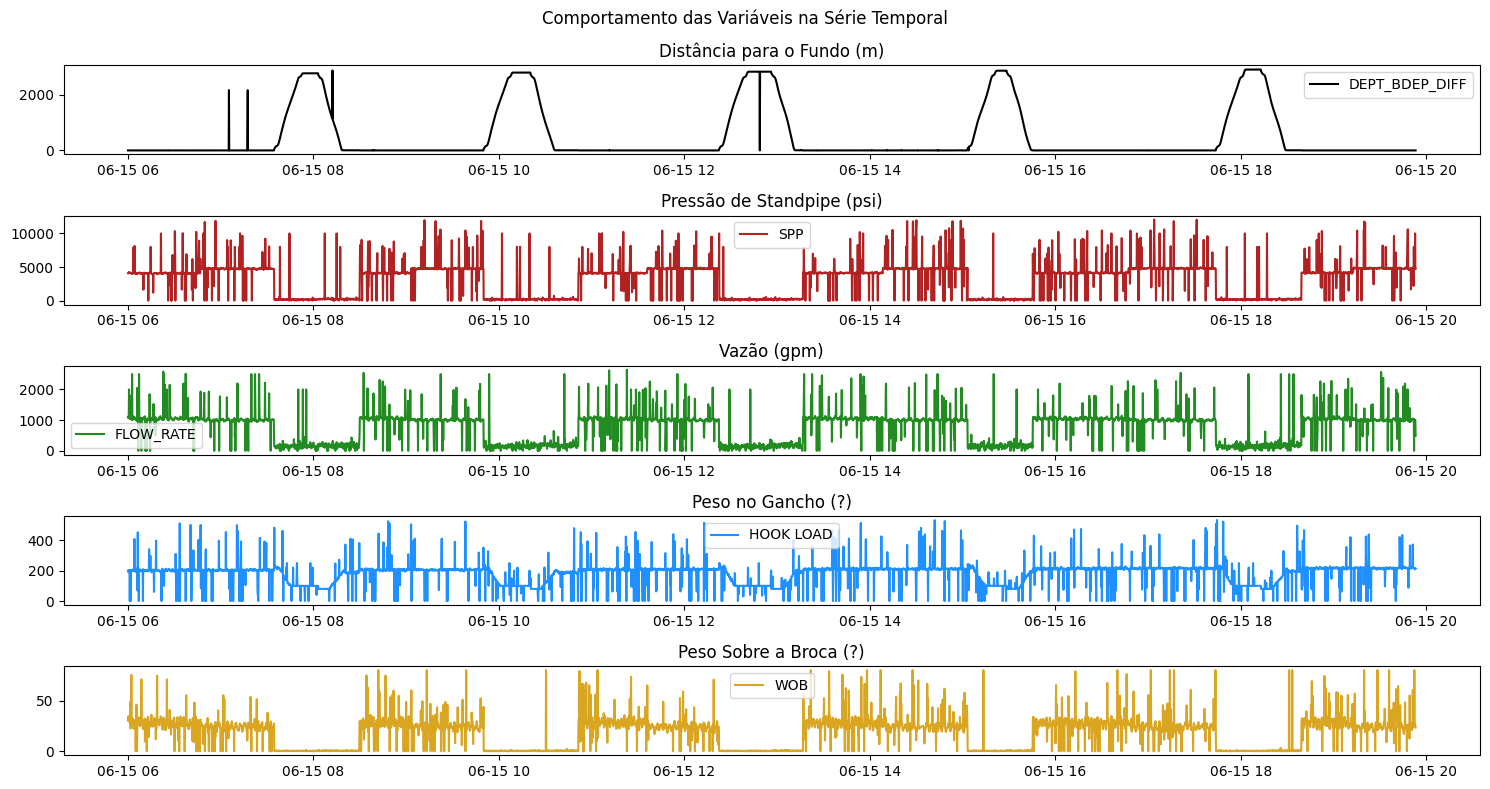

In [ ]:
fig, axs = plt.subplots(nrows=5, ncols=1, figsize=(15, 8))
fig.suptitle("Comportamento das Variáveis na Série Temporal")

axs[0].plot( df_pp['TIMESTAMP'], df_pp['DEPT_BDEP_DIFF'], color="black", label="DEPT_BDEP_DIFF")
axs[0].set_title("Distância para o Fundo (m)")
axs[0].legend()

axs[1].plot( df_pp['TIMESTAMP'],df_pp['SPP'], color="firebrick", label="SPP")
axs[1].set_title("Pressão de Standpipe (psi)")
axs[1].legend()

axs[2].plot( df_pp['TIMESTAMP'],df_pp['FLOW_RATE'], color="forestgreen", label="FLOW_RATE")
axs[2].set_title("Vazão (gpm)")
axs[2].legend()

axs[3].plot(df_pp['TIMESTAMP'], df_pp['HOOK_LOAD'], label="HOOK LOAD", color="dodgerblue")
axs[3].set_title("Peso no Gancho (?)")
axs[3].legend()

axs[4].plot( df_pp['TIMESTAMP'], df_pp['WOB'], label="WOB", color="goldenrod")
axs[4].set_title("Peso Sobre a Broca (?)")
axs[4].legend()

plt.tight_layout()
plt.show()

## Normalização dos Dados

In [ ]:
df_pp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4919 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   DEPT_BDEP_DIFF  4919 non-null   float64       
 1   WOB             4919 non-null   float64       
 2   HOOK_LOAD       4919 non-null   float64       
 3   SPP             4919 non-null   float64       
 4   FLOW_RATE       4919 non-null   float64       
 5   TIMESTAMP       4919 non-null   datetime64[ns]
 6   OPERATION       4919 non-null   object        
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 307.4+ KB


In [ ]:
# Estatísticas descritivas e razão de escala
# Mostra média, desvio, min, max, range, e razão entre maior e menor range
descr = df_pp[vars_continuas].describe().T
descr["range"] = descr["max"] - descr["min"]
descr = descr[["count","mean","std","min","25%","50%","75%","max","range","range_ratio"]]
display(descr.round(4))

,count,mean,std,min,25%,50%,75%,max,range,range_ratio
DEPT_BDEP_DIFF,4919.0,492.0681,950.2161,0.0,0.0000,0.3342,191.1798,2924.0885,2924.0885,NaN
WOB,4919.0,17.9424,14.6171,0.0,0.4451,23.1694,27.0287,80.0000,80.0000,NaN
HOOK_LOAD,4919.0,181.8469,69.7856,0.0,150.0952,205.5159,212.5213,533.2217,533.2217,NaN
SPP,4919.0,3139.5431,2387.8074,0.0,205.8591,4101.5498,4746.2595,12057.1222,12057.1222,NaN
FLOW_RATE,4919.0,750.6756,485.4527,0.0,187.7252,994.7425,1038.6087,2640.0814,2640.0814,NaN


## Avaliação Rápida da Necessidade de Normalização

### **DEPT_BDEP_DIFF**
- **Range = 2924** → extremamente amplo.  
- Varia de 0 até quase 3000.  
- Escala totalmente desbalanceada em relação às demais.  
➡️ **Normalização essencial.**

### **WOB**
- **Range = 80**, bem menor comparado às variáveis de maior amplitude.  
- Escala moderada, mas ainda incompatível com SPP e FLOW_RATE.  
➡️ **Normalização recomendada.**

### **HOOK_LOAD**
- **Range = 533**, maior que WOB, mas bem menor que DEPT_BDEP_DIFF, FLOW_RATE e especialmente SPP.  
- Pode perder importância em modelos sem normalização.  
➡️ **Normalização necessária.**

### **SPP**
- **Range = 12057**, a maior amplitude de todas.  
- Escala gigantesca — dominaria qualquer algoritmo baseado em distância.  
➡️ **Normalização obrigatória.**

### **FLOW_RATE**
- **Range = 2640**, muito grande, segundo maior range entre as variáveis principais.  
- Diferença de escala significativa comparada a WOB e HOOK_LOAD.  
➡️ **Normalização necessária.**

---

## Conclusão Final

As variáveis apresentam ranges que variam **de dezenas (WOB) a dezenas de milhares (SPP)**, resultando em escalas altamente incompatíveis.

Para classificadores — especialmente **KNN, Regressão Logística, SVM e Redes Neurais** — é indispensável aplicar **normalização ou padronização** para:

- impedir que **SPP** ou **FLOW_RATE** dominem o modelo,  
- garantir **estabilidade nos cálculos de distância**,  
- melhorar **convergência e desempenho** dos algoritmos.  

👉 **Conclusão: todas as variáveis devem ser normalizadas antes do treinamento.**

In [ ]:
from scipy.stats import skew, kurtosis

# Skewness e kurtosis (assimetria e curtose)
skew_kurt = pd.DataFrame({
    "skewness": df_pp[vars_continuas].apply(lambda x: skew(x.dropna())),
    "kurtosis": df_pp[vars_continuas].apply(lambda x: kurtosis(x.dropna(), fisher=True))  # Fisher=True => normal=0
})
display(skew_kurt.round(4))

# Interpretação rápida:
# - |skewness| > 1 indica forte assimetria
# - kurtosis >> 0 indica caudas mais pesadas que normal

,skewness,kurtosis
DEPT_BDEP_DIFF,1.6728,1.1276
WOB,0.4425,0.9863
HOOK_LOAD,0.0866,3.6901
SPP,0.1728,-0.0373
FLOW_RATE,0.1557,0.2036


## Avaliação Rápida de Skewness e Kurtosis

### **DEPT_BDEP_DIFF**
- **Skewness = 1.6728** → forte assimetria à direita.  
- **Kurtosis = 1.1276** → caudas mais pesadas que o normal.  
➡️ **Recomendado:** normalização + possível transformação (log, Box-Cox).

### **WOB**
- **Skewness = 0.4425** → leve assimetria.  
- **Kurtosis = 0.9863** → caudas levemente pesadas.  
➡️ **Recomendado:** normalização simples; transformação é opcional.

### **HOOK_LOAD**
- **Skewness = 0.0866** → praticamente simétrica.  
- **Kurtosis = 3.6901** → caudas pesadas (muitos valores extremos).  
➡️ **Recomendado:** tratar outliers antes; normalização em seguida.

### **SPP**
- **Skewness = 0.1728** → quase simétrica.  
- **Kurtosis = -0.0373** → muito próxima da normal.  
➡️ **Recomendado:** apenas normalização.

### **FLOW_RATE**
- **Skewness = 0.1557** → quase simétrica.  
- **Kurtosis = 0.2036** → levemente leptocúrtica, mas não é crítico.  
➡️ **Recomendado:** normalização simples.

---

## Conclusão Geral
- **DEPT_BDEP_DIFF** → variável com maior distorção; transformação recomendada.  
- **HOOK_LOAD** → simétrica, porém com caudas pesadas; atenção aos outliers.  
- **WOB, SPP e FLOW_RATE** → próximas da normalidade; seguir direto para normalização.

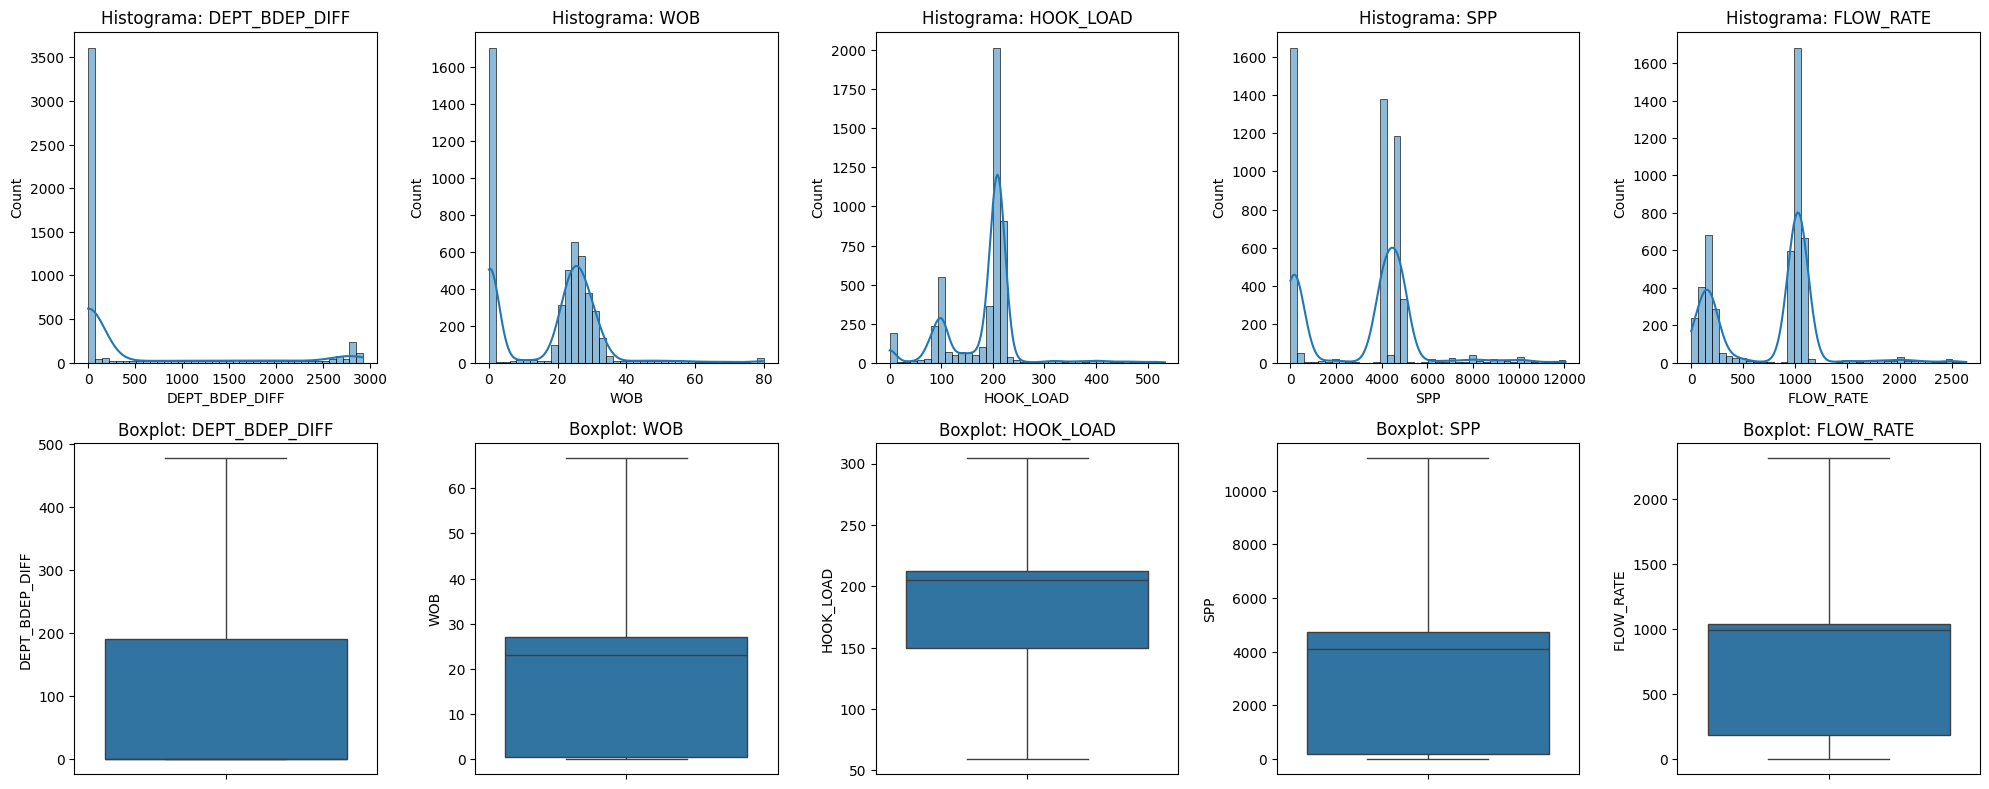

In [ ]:
# Histogramas + boxplots (uma coluna por subplot)
fig, axes = plt.subplots(2, len(vars_continuas), figsize=(4*len(vars_continuas), 8))

for i, col in enumerate(vars_continuas):
    sns.histplot(df_pp[col].dropna(), bins=40, kde=True, ax=axes[0, i])
    axes[0, i].set_title(f"Histograma: {col}")
    sns.boxplot(y=df_pp[col].dropna(), ax=axes[1, i], showfliers=False)
    axes[1, i].set_title(f"Boxplot: {col}")

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.preprocessing import MinMaxScaler

df_norm = df_pp.copy()


df_norm['DEPT_BDEP_DIFF'] = MinMaxScaler().fit_transform(df_norm[['DEPT_BDEP_DIFF']])
df_norm['WOB'] = MinMaxScaler().fit_transform(df_norm[['WOB']])
df_norm['HOOK_LOAD'] = MinMaxScaler().fit_transform(df_norm[['HOOK_LOAD']])
df_norm['SPP'] = MinMaxScaler().fit_transform(df_norm[['SPP']])
df_norm['FLOW_RATE'] = MinMaxScaler().fit_transform(df_norm[['FLOW_RATE']])

df_norm.head()

,DEPT_BDEP_DIFF,WOB,HOOK_LOAD,SPP,FLOW_RATE,TIMESTAMP,OPERATION
0,0.000041,0.377589,0.374348,0.338266,0.410392,2024-06-15 06:00:00,Rotary Drilling
1,0.000000,0.410679,0.359126,0.343007,0.420946,2024-06-15 06:00:10,Rotary Drilling
2,0.000182,0.433772,0.367494,0.346394,0.413135,2024-06-15 06:00:20,Rotary Drilling
3,0.000182,0.411294,0.380024,0.349788,0.417700,2024-06-15 06:00:30,Rotary Drilling
4,0.000087,0.388816,0.372350,0.347657,0.757552,2024-06-15 06:00:40,Rotary Drilling


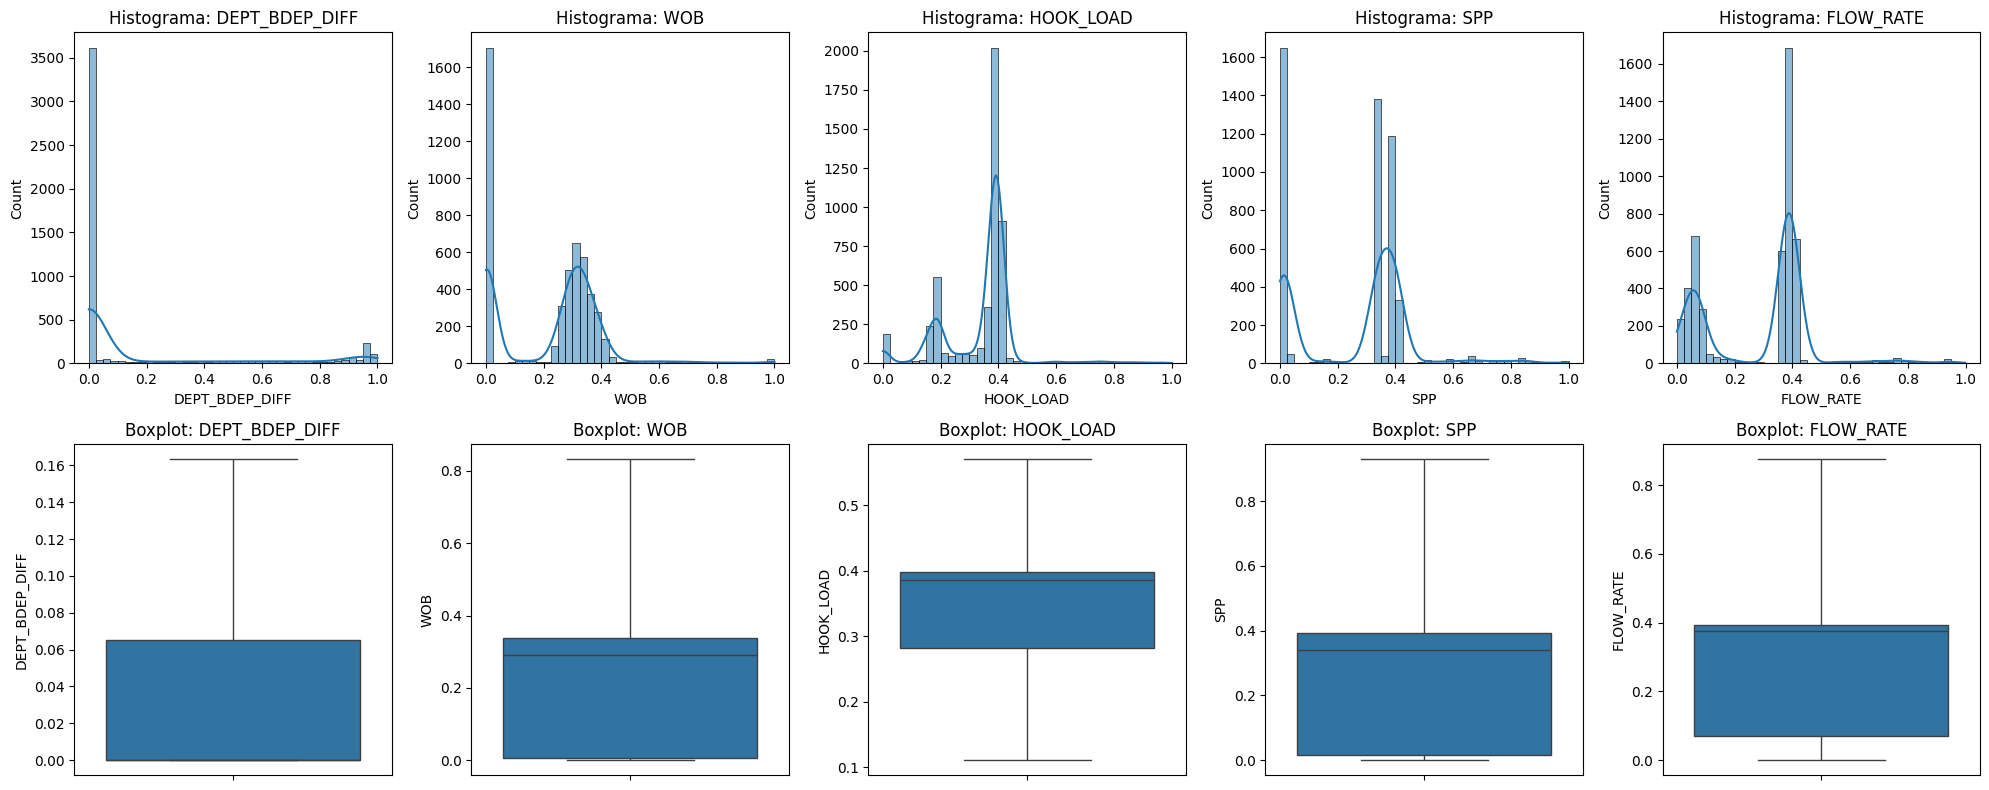

In [ ]:
# Histogramas + boxplots (uma coluna por subplot)
fig, axes = plt.subplots(2, len(vars_continuas), figsize=(4*len(vars_continuas), 8))

for i, col in enumerate(vars_continuas):
    sns.histplot(df_norm[col].dropna(), bins=40, kde=True, ax=axes[0, i])
    axes[0, i].set_title(f"Histograma: {col}")
    sns.boxplot(y=df_norm[col].dropna(), ax=axes[1, i], showfliers=False)
    axes[1, i].set_title(f"Boxplot: {col}")

plt.tight_layout()
plt.show()

Após a normalização utilizando MinMaxScaler chegamos a variáveis com o mesmo patarmar em módulo, porém seguindos suas respectivas tendências, o que nos indica que não houve perda de informação, porém garantindo que todas as variáveis tenham influências próximas.

## Análise de Correlação

Vamos analisar como podemos avaliar as correlações entre as variáveis disponíveis e como elas respondem as nossas categorias para o classificador.

In [ ]:
df_pre = df_norm.copy()

target_col = "OPERATION"

# Inspeção rápida
print("Tamanho inicial:", df_pre.shape)
print("Classes (target):", df_pre[target_col].nunique(), "->", df_pre[target_col].unique()[:10])

Tamanho inicial: (4919, 7)
Classes (target): 4 -> ['Rotary Drilling' 'Slide Drilling' 'Trip Out' 'Trip In']


Pearson:
                 DEPT_BDEP_DIFF    WOB  HOOK_LOAD    SPP  FLOW_RATE
DEPT_BDEP_DIFF           1.000 -0.619     -0.579 -0.615     -0.617
WOB                     -0.619  1.000      0.394  0.659      0.675
HOOK_LOAD               -0.579  0.394      1.000  0.390      0.406
SPP                     -0.615  0.659      0.390  1.000      0.673
FLOW_RATE               -0.617  0.675      0.406  0.673      1.000 

Spearman:
                 DEPT_BDEP_DIFF    WOB  HOOK_LOAD    SPP  FLOW_RATE
DEPT_BDEP_DIFF           1.000 -0.605     -0.525 -0.608     -0.618
WOB                     -0.605  1.000      0.368  0.458      0.612
HOOK_LOAD               -0.525  0.368      1.000  0.450      0.429
SPP                     -0.608  0.458      0.450  1.000      0.490
FLOW_RATE               -0.618  0.612      0.429  0.490      1.000 

Kendall:
                 DEPT_BDEP_DIFF    WOB  HOOK_LOAD    SPP  FLOW_RATE
DEPT_BDEP_DIFF           1.000 -0.418     -0.389 -0.433     -0.436
WOB                     -0.

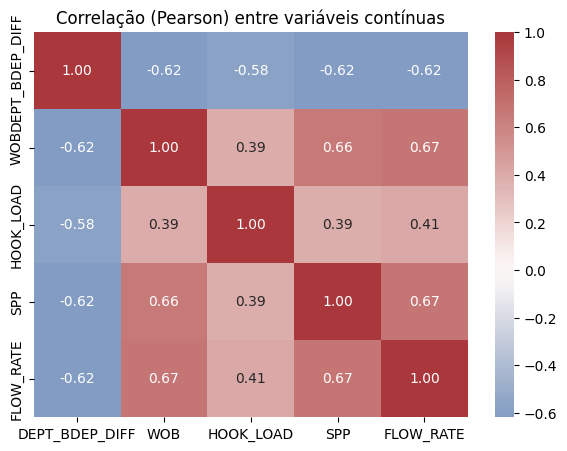

In [ ]:
# Célula 4 — Correlação entre variáveis contínuas (Pearson, Spearman, Kendall)
pearson_corr = df_pre[vars_continuas].corr(method="pearson")
spearman_corr = df_pre[vars_continuas].corr(method="spearman")
kendall_corr = df_pre[vars_continuas].corr(method="kendall")

print("Pearson:\n", pearson_corr.round(3), "\n")
print("Spearman:\n", spearman_corr.round(3), "\n")
print("Kendall:\n", kendall_corr.round(3), "\n")

# Heatmap (Pearson por padrão)
plt.figure(figsize=(7,5))
sns.heatmap(pearson_corr, annot=True, fmt=".2f", cmap="vlag", center=0)
plt.title("Correlação (Pearson) entre variáveis contínuas")
plt.show()

### **Análise de Correlação entre as Variáveis**

Foram avaliadas as correlações utilizando três métodos — **Pearson**, **Spearman** e **Kendall** — permitindo identificar tanto relações lineares quanto monotônicas entre as variáveis do conjunto de dados.

---

### **1. Correlação Geral entre as Variáveis**
De modo consistente em todos os métodos, observamos dois padrões principais:

- **DEPT_BDEP_DIFF** apresenta **correlações negativas moderadas** com todas as demais variáveis.  
  Isso indica que, conforme a diferença de profundidade aumenta, valores como **WOB**, **HOOK_LOAD**, **SPP** e **FLOW_RATE** tendem a diminuir.
  
  **Interpretação da operação**. O aumento da distância entre a broca e o fundo do poço indica um status de não perfuração. Em geral, durante manobras e outras operações, a circulação de fluido é reduzida ou desligada, o que impacta diretamente no perfil de pressão observado no poço, incluindo a pressão de standpipe. Ainda, quando a broca se distancia do fundo, o peso da coluna de perfuração que antes estava apoiado sobre a broca (WOB) tende a zerar.

- As variáveis operacionais (**WOB**, **HOOK_LOAD**, **SPP**, **FLOW_RATE**) apresentam **correlações positivas entre si**, refletindo o comportamento natural dos parâmetros de perfuração, que costumam variar em conjunto.

---

### **2. Pearson (correlação linear)**
- As maiores correlações positivas ocorrem entre:  
  - **WOB–FLOW_RATE (0.675)**  
  - **SPP–FLOW_RATE (0.673)**  
  - **WOB–SPP (0.659)**  
- Indica relações lineares moderadas entre as variáveis operacionais.  
- **DEPT_BDEP_DIFF** apresenta relação linear negativa significativa com todas as demais (**≈ –0.60**).

---

### **3. Spearman (correlação monotônica)**
- Os padrões observados no Pearson se mantêm.  
- As magnitudes são ligeiramente menores, mas mostram que as relações são **monotônicas e consistentes**, mesmo sem assumir linearidade.

---

### **4. Kendall (consistência de ranking)**
- As correlações são menores, como esperado, porém apresentam **o mesmo padrão estrutural**:
  - **DEPT_BDEP_DIFF** negativamente correlacionado com todas as variáveis.
  - **WOB**, **SPP** e **FLOW_RATE** formando o trio com as correlações positivas mais fortes.

---

### **Conclusão da Análise**
- **DEPT_BDEP_DIFF** possui comportamento inverso às variáveis operacionais.  
- **WOB, HOOK_LOAD, SPP e FLOW_RATE** apresentam correlações positivas moderadas entre si.  
- Nenhuma relação ultrapassa 0.80, indicando **ausência de multicolinearidade severa**, embora correlações moderadas devam ser consideradas no pré-processamento e na escolha dos modelos.

As relações são claras, consistentes e fornecem base sólida para decisões referentes ao tratamento dos dados e à modelagem.

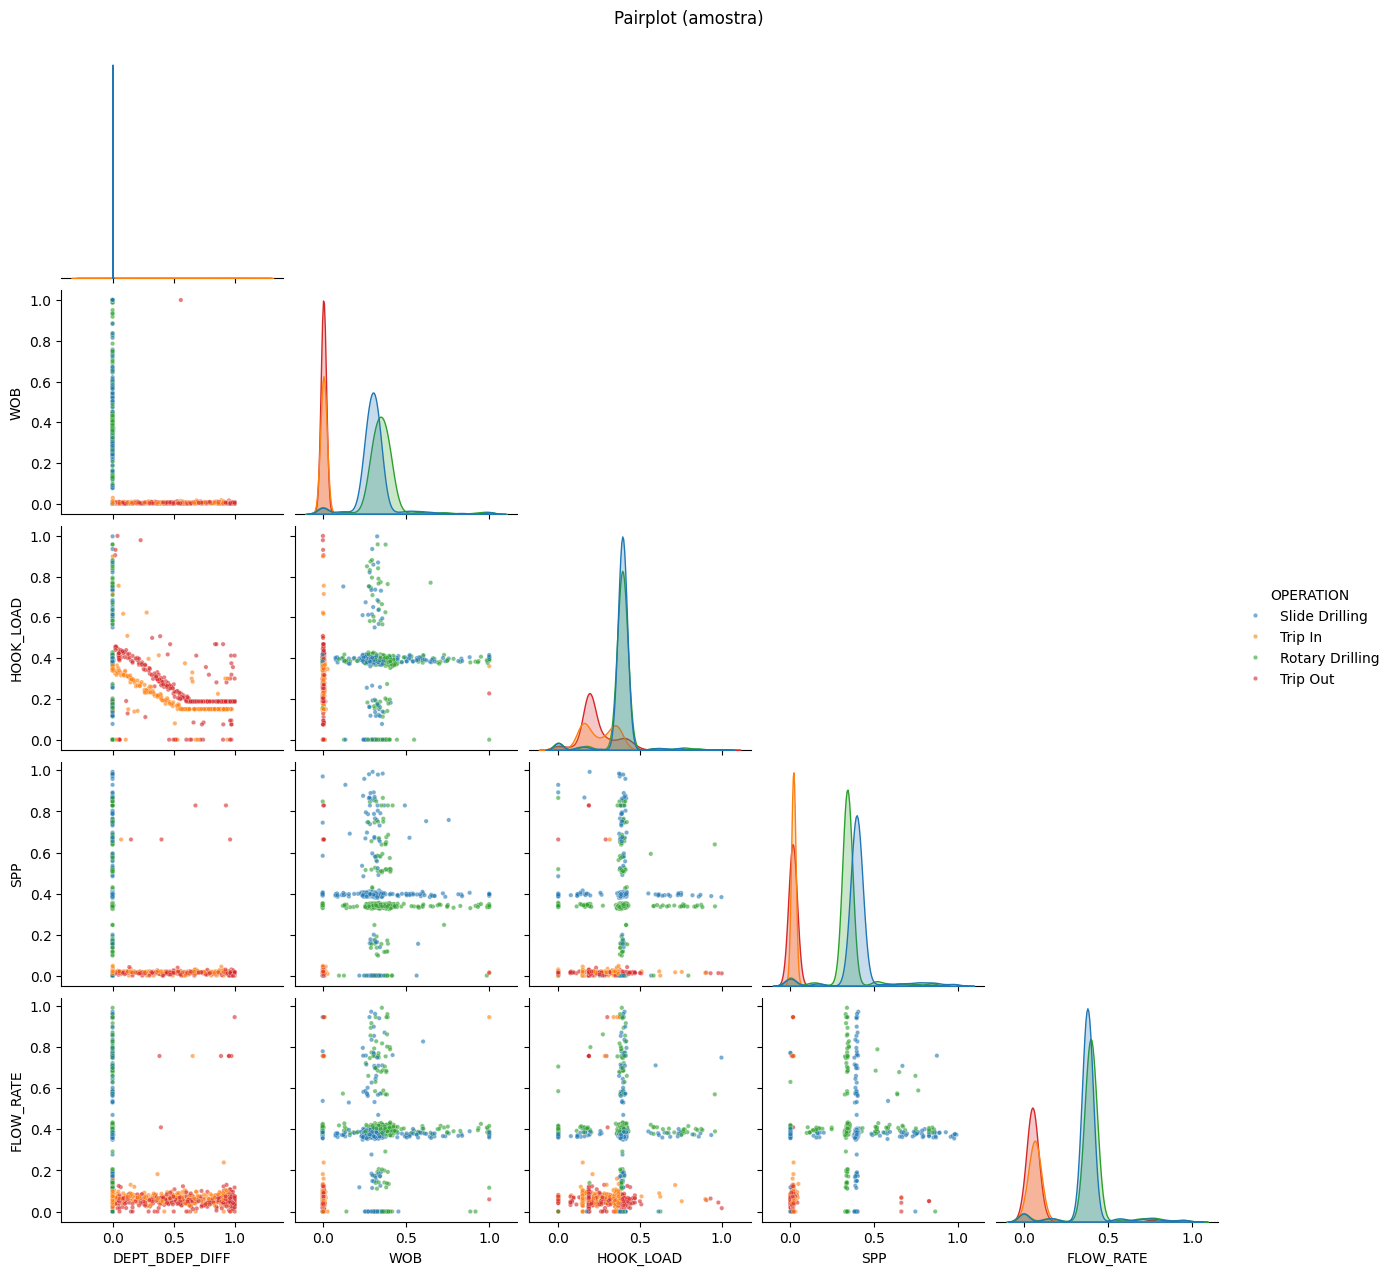

In [ ]:
# Pairplot (opcional) colorindo pela classe
max_points_for_pairplot = 2000  # amostra para pairplot, para evitar travamento
sample = df_pre.dropna(subset=vars_continuas + [target_col])
if len(sample) > max_points_for_pairplot:
    sample = sample.sample(max_points_for_pairplot, random_state=42)

sns.pairplot(sample[vars_continuas + [target_col]], hue=target_col, corner=True, plot_kws={"s":10, "alpha":0.6})
plt.suptitle("Pairplot (amostra)", y=1.02)
plt.show()

In [ ]:
# Relação variável contínua × variável categórica: estatísticas por grupo
group_stats = df_pre.groupby(target_col)[vars_continuas].agg(["count","mean","std","min","max"])
# O resultado tem multiindex; mostramos por variável para legibilidade:
for col in vars_continuas:
    print(f"\n--- Estatísticas por classe para {col} ---")
    display(group_stats[col].round(3))


--- Estatísticas por classe para DEPT_BDEP_DIFF ---


,count,mean,std,min,max
OPERATION,,,,,
Rotary Drilling,1605,0.000,0.000,0.0,0.005
Slide Drilling,1726,0.001,0.025,0.0,0.744
Trip In,717,0.332,0.342,0.0,0.986
Trip Out,871,0.675,0.335,0.0,1.000



--- Estatísticas por classe para WOB ---


,count,mean,std,min,max
OPERATION,,,,,
Rotary Drilling,1605,0.351,0.127,0.0,1.0
Slide Drilling,1726,0.306,0.113,0.0,1.0
Trip In,717,0.009,0.064,0.0,1.0
Trip Out,871,0.005,0.034,0.0,1.0



--- Estatísticas por classe para HOOK_LOAD ---


,count,mean,std,min,max
OPERATION,,,,,
Rotary Drilling,1605,0.383,0.112,0.0,0.985
Slide Drilling,1726,0.386,0.112,0.0,0.998
Trip In,717,0.259,0.122,0.0,0.929
Trip Out,871,0.243,0.119,0.0,1.000



--- Estatísticas por classe para SPP ---


,count,mean,std,min,max
OPERATION,,,,,
Rotary Drilling,1605,0.342,0.108,0.0,0.866
Slide Drilling,1726,0.403,0.131,0.0,1.000
Trip In,717,0.022,0.063,0.0,0.829
Trip Out,871,0.025,0.090,0.0,0.829



--- Estatísticas por classe para FLOW_RATE ---


,count,mean,std,min,max
OPERATION,,,,,
Rotary Drilling,1605,0.399,0.120,0.0,1.000
Slide Drilling,1726,0.378,0.112,0.0,0.973
Trip In,717,0.073,0.076,0.0,0.947
Trip Out,871,0.062,0.084,0.0,0.947


#### **Análise da Influência das Variáveis no Classificador a partir das Estatísticas por Classe**

As estatísticas por classe permitem entender **como cada variável se distribui entre as operações**, revelando **o quanto ela contribui para separar as classes**. Quanto maior a diferença entre médias e dispersões entre as classes, maior tende a ser a capacidade da variável em ajudar o classificador a discriminar corretamente cada operação.

---

## **1. DEPT_BDEP_DIFF — Forte distinção entre operações de trip e drilling**
A variável apresenta valores praticamente nulos em **Rotary Drilling** e **Slide Drilling**, enquanto cresce progressivamente nas classes **Trip In** e **Trip Out** (médias de 0.332 e 0.675).  
Essa diferença clara entre grupos faz dessa variável um dos **principais indicadores** para separar modos de perfuração dos modos de movimentação da coluna.

➡️ **Alta influência no classificador**, especialmente na distinção *Drilling vs Trip*.

---

## **2. WOB — Excelente separação do grupo Drilling**
WOB apresenta valores altos e consistentes em **Rotary Drilling** (0.351) e **Slide Drilling** (0.306), mas praticamente nulos em **Trip In** e **Trip Out**.  
Essa separação quase binária faz o WOB ser um **forte discriminador entre estados operacionais ativos de perfuração e movimentações da coluna**.

➡️ **Variável de alta relevância** para identificar se o poço está realmente perfurando.

---

## **3. HOOK_LOAD — Indicador moderado das transições entre operações**
HOOK_LOAD tem médias semelhantes entre Rotary e Slide (~0.38), mas cai consideravelmente para Trip In e Trip Out (~0.25).  
Apesar de não separar bem Rotary vs Slide, ainda auxilia na distinção entre **operações de perfuração e operações de movimentação**.

➡️ **Influência moderada**, complementando variáveis mais discriminantes.

---

## **4. SPP — Indicador forte para diferenciar operações de perfuração**
A pressão de bomba (SPP) é muito maior em Rotary (0.342) e Slide (0.403) e praticamente nula em Trip In/Out.  
Além disso, apresenta diferença clara entre as duas operações de perfuração, o que ajuda o modelo a distinguir inclusive **Rotary vs Slide**.

➡️ **Alta influência**, tanto na separação Drilling vs Trip quanto dentro do próprio grupo Drilling.

---

## **5. FLOW_RATE — Comportamento semelhante ao SPP, reforçando o padrão**
FLOW_RATE é alto nas classes de perfuração (~0.39) e baixo nos modos Trip (~0.07).  
Assim como SPP, fornece um forte sinal operacional, corroborando a atividade de circulação durante a perfuração.

➡️ **Variável de alta influência**, fortalecendo a decisão do classificador junto ao SPP e WOB.

---

## **Conclusão Geral**
As variáveis apresentam diferentes níveis de capacidade discriminativa:

- **Muito fortes:**  
  **WOB, SPP, FLOW_RATE, DEPT_BDEP_DIFF**  
  → separam de forma clara perfuração vs movimentação.

- **Moderada:**  
  **HOOK_LOAD**  
  → ajuda na transição e complementa as outras variáveis.

De modo geral, os dados mostram que o classificador conta com um conjunto de variáveis que fornecem **sinais claros e consistentes entre as classes**, o que favorece o aprendizado, reduz ambiguidade e contribui para um desempenho robusto na identificação das operações de poço.

In [ ]:
from sklearn.feature_selection import mutual_info_classif

# Mutual Information (medida não paramétrica de dependência com a variável categórica)
# Preparamos X (numéricas) e y (target codificado)
data_mi = df_pre[vars_continuas + [target_col]].dropna()
X = data_mi[vars_continuas].values
y = data_mi[target_col].astype('category').cat.codes.values  # codifica categorias como inteiros

mi = mutual_info_classif(X, y, random_state=42)
mi_table = pd.DataFrame({"variavel": vars_continuas, "mutual_info": mi})
mi_table = mi_table.sort_values("mutual_info", ascending=False).reset_index(drop=True)######
display(mi_table.round(4))

,variavel,mutual_info
0,SPP,1.0507
1,FLOW_RATE,0.7514
2,WOB,0.7178
3,DEPT_BDEP_DIFF,0.6843
4,HOOK_LOAD,0.5566


A Mutual Information mostra o quanto cada variável ajuda a prever a classe. Aqui, **SPP é a mais informativa**, seguida de **FLOW_RATE**, **WOB** e **DEPT_BDEP_DIFF**, todas com boa relevância. **HOOK_LOAD é a menos informativa**, mas ainda contribui moderadamente. No geral, todas as variáveis têm relação útil com a variável alvo, indicando que podem ajudar no classificador.


## Análise de Tendência

Baseado [Comportamento das Variáveis na Série Temporal](https://colab.research.google.com/drive/1_bhFba7JAvx9RzB-I1EV7Wwu2gdN_nLk#scrollTo=YdZftkYvIlgK&line=3&uniqifier=1), é possível observar que existem tendências em cada uma das variáveis, mas que pela natureza desses dados, incluem ruídos. Neste caso, pode-se considerar uma análise voltado para utilização de média ou mediana móvel, de forma a "simplificar" o conjunto de dados apresentado ao modelo a ser treinado.

In [ ]:
# Calcular a média móvel e mediana móvel a partir do dataset
# Dataset sem outliers está sendo utilizado

NUMERICAL_COLS = ['DEPT_BDEP_DIFF','SPP', 'FLOW_RATE', 'HOOK_LOAD','WOB']
window_size = 10
moving_avg_df = df_pp[NUMERICAL_COLS].rolling(window=window_size, center=True).mean()
moving_median_df = df_pp[NUMERICAL_COLS].rolling(window=window_size, center=True).median()


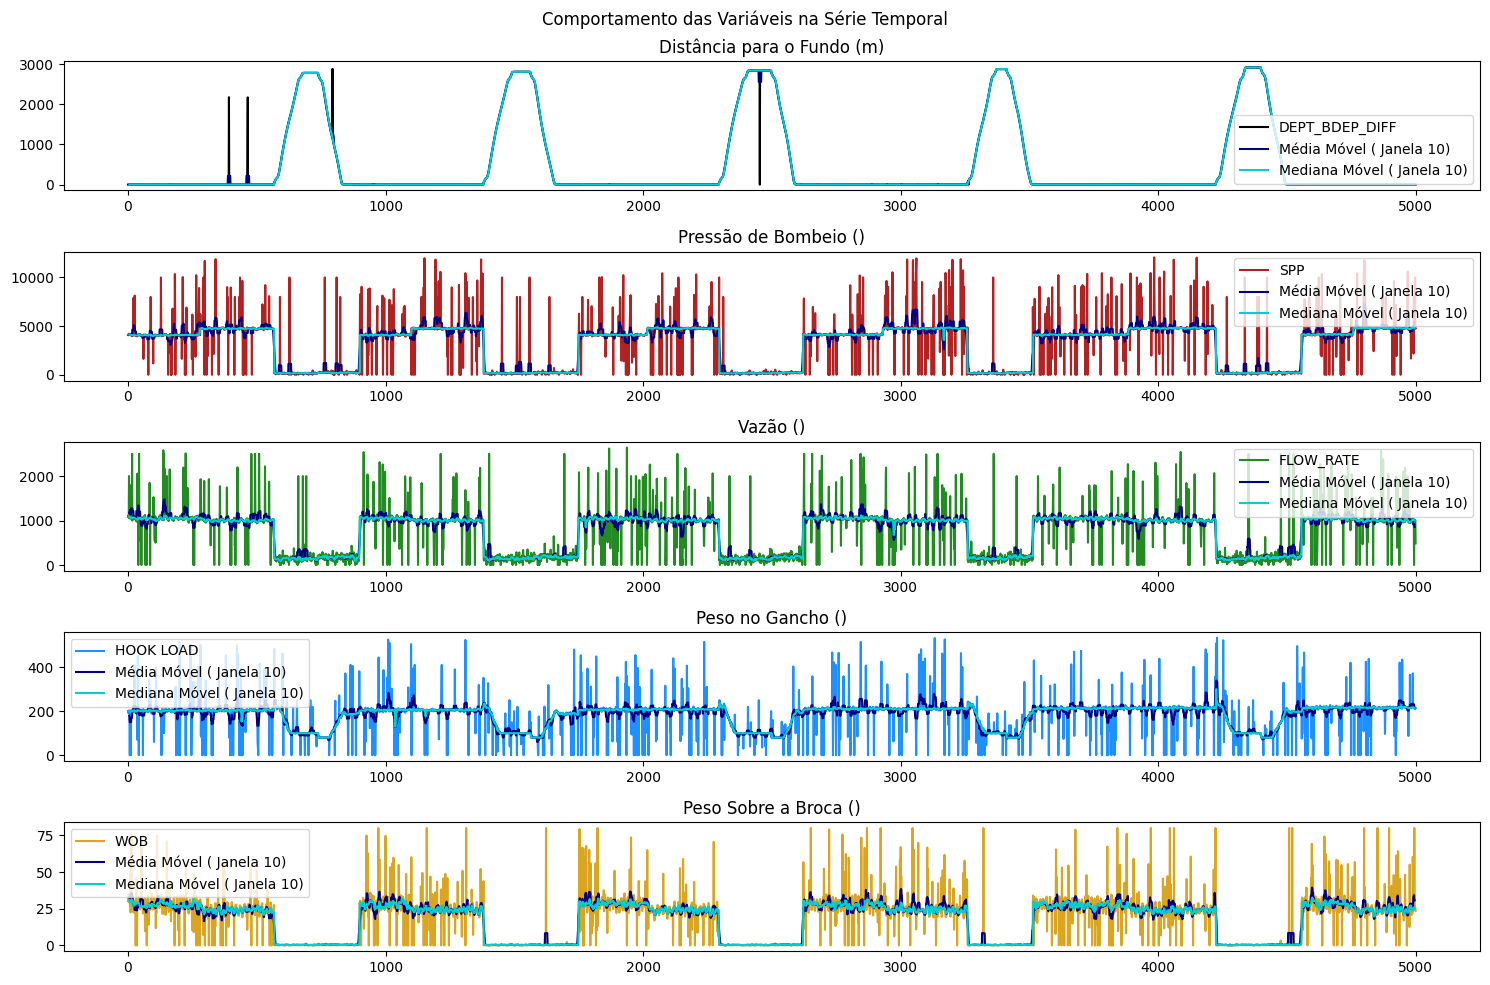

In [ ]:
fig, axs = plt.subplots(nrows=5, ncols=1, figsize=(15, 10))
fig.suptitle("Comportamento das Variáveis na Série Temporal")

axs[0].plot(df_pp['DEPT_BDEP_DIFF'], color="black", label="DEPT_BDEP_DIFF")
axs[0].plot(moving_avg_df['DEPT_BDEP_DIFF'], color="navy", label=f"Média Móvel ( Janela {window_size})")
axs[0].plot(moving_median_df['DEPT_BDEP_DIFF'], color="darkturquoise", label=f"Mediana Móvel ( Janela {window_size})")
axs[0].set_title("Distância para o Fundo (m)")
axs[0].legend()

axs[1].plot(df_pp['SPP'], color="firebrick", label="SPP")
axs[1].plot(moving_avg_df['SPP'], color="navy", label=f"Média Móvel ( Janela {window_size})")
axs[1].plot(moving_median_df['SPP'], color="darkturquoise", label=f"Mediana Móvel ( Janela {window_size})")
axs[1].set_title("Pressão de Bombeio ()")
axs[1].legend()

axs[2].plot(df_pp['FLOW_RATE'], color="forestgreen", label="FLOW_RATE")
axs[2].plot(moving_avg_df['FLOW_RATE'], color="navy", label=f"Média Móvel ( Janela {window_size})")
axs[2].plot(moving_median_df['FLOW_RATE'], color="darkturquoise", label=f"Mediana Móvel ( Janela {window_size})")
axs[2].set_title("Vazão ()")
axs[2].legend()

axs[3].plot(df_pp['HOOK_LOAD'], label="HOOK LOAD", color="dodgerblue")
axs[3].plot(moving_avg_df['HOOK_LOAD'], color="navy", label=f"Média Móvel ( Janela {window_size})")
axs[3].plot(moving_median_df['HOOK_LOAD'], color="darkturquoise", label=f"Mediana Móvel ( Janela {window_size})")
axs[3].set_title("Peso no Gancho ()")
axs[3].legend()

axs[4].plot(df_pp['WOB'], label="WOB", color="goldenrod")
axs[4].plot(moving_avg_df['WOB'], color="navy", label=f"Média Móvel ( Janela {window_size})")
axs[4].plot(moving_median_df['WOB'], color="darkturquoise", label=f"Mediana Móvel ( Janela {window_size})")
axs[4].set_title("Peso Sobre a Broca ()")
axs[4].legend()

plt.tight_layout()
plt.show()

Aqui podemos notar que quando utilizamos uma janela móvel e calculamos tanto a sua mediana como a média, temos variáveis com um comportamento menos ruidos e que segue bem seu comportamento temporal, além disso percebemos que muitos possíveis *outliers* foram removidos utilizando essa técnica, ideal para o nosso cenário.

Diante do gráfico acima, optou-se por **fornecer a mediana móvel ao modelo**, por ser menos influênciada a grande variáções que não corresponde as tendências dos dados.

Após avaliação optou-se por utilizar uma janela de **10 pontos** (10s) que fez uma boa aproximação aos dados.

Finalizada essa etapa de *baseline* e seguindo para uma otimização do modelo, uma melhor uma análise do tamanho dessa janela com relação a performance do modelo poderá ser explorada, buscando assim, seguir com um valor mais otimizado.

# Pipeline Desenvolvido: Arquitetura da solução com justificativas

### Pré-processamento



A seguir apresentamos nossa função de pré-processamento, responsável por centralizar todas as etapas essenciais antes do treinamento dos modelos, incluindo seleção de variáveis, limpeza, padronização e organização dos dados. Essa função garante que todo o conjunto esteja padronizado e pronto para entrar nas pipelines de decisão, reduzindo erros, aumentando a consistência e facilitando a reprodução dos experimentos. Com isso, criamos uma base sólida para que os modelos possam aprender de maneira eficiente e confiável.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

def outliers_std(series, k=3):
    """Retorna outliers usando média ± k * desvio-padrão."""
    mean = series.mean()
    std = series.std()
    lower = mean - k * std
    upper = mean + k * std
    return (series < lower) | (series > upper), lower, upper

def preprocess_data(df, target_col, scale_numeric=True):

    working_variables = ['DEPT_BDEP_DIFF','WOB','HOOK_LOAD','SPP','FLOW_RATE']
    df = df[working_variables + [target_col]]

    for col in working_variables:
        df[col] = df[col].apply(lambda x: 0 if x < 0 else x)

    df = df.interpolate(method="linear").copy()

    dados_perdidos = []
    for col in working_variables:
      mask = outliers_std(df[col], k=4)[0]
      qtd_outliers = mask.sum()
      total = len(df[col])
      perc = (qtd_outliers / total) * 100
      dados_perdidos.append([col, qtd_outliers, total, perc])
      df.loc[mask, col] = np.nan
      df.dropna(inplace=True)

    for col in working_variables:
      df[col] = df[col].rolling(window=10).median()

    df.dropna(inplace=True)
    X = df.drop(columns=[target_col])
    y = df[target_col]

    return X, y


In [ ]:
X, y = preprocess_data(df, target_col="OPERATION")

Saída X da nossa pipeline de pré-processamento

In [ ]:
X.head()

,DEPT_BDEP_DIFF,WOB,HOOK_LOAD,SPP,FLOW_RATE
9,0.454563,31.020077,199.077849,4140.396985,1087.090095
10,0.454563,31.020077,198.287595,4140.396985,1085.818201
11,0.454563,30.205292,198.287595,4133.236002,1078.747253
12,0.444269,29.391335,198.567237,4120.423825,1078.747253
13,0.364434,29.391335,198.567237,4108.171338,1073.482340


Saída y da nossa pipeline de pré-processamento

In [ ]:
y.head()

,OPERATION
9,Rotary Drilling
10,Rotary Drilling
11,Rotary Drilling
12,Rotary Drilling
13,Rotary Drilling


### Treinamento

Também introduzimos uma função dedicada ao treinamento de múltiplos classificadores, permitindo avaliar diferentes algoritmos de forma organizada, comparável e com validação robusta usando K-Fold estratificado. Essa função automatiza o ciclo de treino, validação e cálculo das métricas principais, possibilitando identificar rapidamente qual modelo apresenta o melhor desempenho. Ela serve como uma ferramenta prática para experimentação, ajudando na escolha do classificador mais adequado para o problema.

In [ ]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

def train_classifiers(X, y, n_splits=5, test_size=0.2, random_state=42):

    # Split estratificado 80/20
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=test_size,stratify=y,random_state=random_state)

    working_variables = ['DEPT_BDEP_DIFF','WOB','HOOK_LOAD','SPP','FLOW_RATE']
    if working_variables:
        num_cols = X_train.select_dtypes(include=np.number).columns
        scaler = MinMaxScaler()
        X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

    classifiers = {
        "Logistic Regression": LogisticRegression(max_iter=1000, random_state=random_state),
        "Decision Tree": DecisionTreeClassifier(random_state=random_state),
        "KNN": KNeighborsClassifier()
    }

    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)

    results_cv = {clf_name: {"accuracy": [], "f1": []} for clf_name in classifiers}
    results_final = {}

    # Loop pelos classificadores
    for clf_name, clf in classifiers.items():
        print(f"\nTreinando {clf_name}...")

        for fold, (train_idx, val_idx) in enumerate(skf.split(X_train, y_train), 1):

            X_tr, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
            y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

            clf.fit(X_tr, y_tr)
            preds = clf.predict(X_val)

            acc = accuracy_score(y_val, preds)
            f1 = f1_score(y_val, preds, average="weighted")

            results_cv[clf_name]["accuracy"].append(acc)
            results_cv[clf_name]["f1"].append(f1)

            print(f"  Fold {fold}: acc={acc:.4f} | f1={f1:.4f}")

        X_test[num_cols] = scaler.transform(X_test[num_cols])
        clf.fit(X_train, y_train)
        preds_final = clf.predict(X_test)

        acc_final = accuracy_score(y_test, preds_final)
        f1_final = f1_score(y_test, preds_final, average="weighted")

        results_final[clf_name] = {
            "accuracy": acc_final,
            "f1": f1_final
        }

        print(f"  -> Final (treinado com 80%): acc={acc_final:.4f} | f1={f1_final:.4f}")

    return results_cv, results_final

### Predição

Saída do nosso treinamento dos classificadores.

In [ ]:
cv_results, final_results = train_classifiers(X, y)


Treinando Logistic Regression...
  Fold 1: acc=0.9249 | f1=0.9250
  Fold 2: acc=0.9491 | f1=0.9487
  Fold 3: acc=0.9389 | f1=0.9388
  Fold 4: acc=0.9363 | f1=0.9364
  Fold 5: acc=0.9299 | f1=0.9298
  -> Final (treinado com 80%): acc=0.9379 | f1=0.9381

Treinando Decision Tree...
  Fold 1: acc=0.9529 | f1=0.9529
  Fold 2: acc=0.9784 | f1=0.9784
  Fold 3: acc=0.9733 | f1=0.9732
  Fold 4: acc=0.9771 | f1=0.9770
  Fold 5: acc=0.9694 | f1=0.9695
  -> Final (treinado com 80%): acc=0.9807 | f1=0.9807

Treinando KNN...
  Fold 1: acc=0.9682 | f1=0.9682
  Fold 2: acc=0.9898 | f1=0.9898
  Fold 3: acc=0.9784 | f1=0.9783
  Fold 4: acc=0.9771 | f1=0.9771
  Fold 5: acc=0.9809 | f1=0.9809
  -> Final (treinado com 80%): acc=0.9857 | f1=0.9858


Os resultados obtidos durante o processo de validação cruzada mostram uma evolução significativa no desempenho dos classificadores após o pré-processamento aplicado. O ***Logistic Regression*** apresentou métricas estáveis entre os folds, alcançando um desempenho final de aproximadamente 94% de acurácia e F1-score, o que indica boa capacidade de generalização, apesar de ser um modelo linear e mais simples.

O ***Decision Tree*** demonstrou desempenho superior ao da regressão logística, com acurácias e F1-scores consistentemente altos em todos os folds, atingindo quase 98% no treinamento final. Isso evidencia a capacidade do modelo de capturar não linearidades presentes nos dados, embora árvores possam ser mais sensíveis a variações no conjunto de treino.

Por fim, o ***KNN*** foi o modelo com melhor desempenho geral, atingindo aproximadamente 98.6% de acurácia e F1-score no treinamento final. O ganho expressivo de performance reforça o impacto positivo da normalização e da suavização dos sinais, já que o KNN depende fortemente de medidas de distância para classificar corretamente.

***De forma geral, os três classificadores apresentaram resultados sólidos, com clara vantagem para modelos baseados em distância e árvores, indicando que o conjunto de dados, após pré-processamento, apresenta padrões bem definidos entre as classes.***

# Resultados e Métricas: Validação da qualidade do pipeline

=== Métricas Gerais ===
Acurácia: 0.9807
F1-score (weighted): 0.9807

=== F1-score por Classe ===


,precision,recall,f1-score,support
Rotary Drilling,0.993651,0.981191,0.987382,319.000000
Slide Drilling,0.988372,0.985507,0.986938,345.000000
Trip In,0.952703,0.979167,0.965753,144.000000
Trip Out,0.965714,0.971264,0.968481,174.000000
accuracy,0.980652,0.980652,0.980652,0.980652
macro avg,0.975110,0.979282,0.977139,982.000000
weighted avg,0.980842,0.980652,0.980705,982.000000


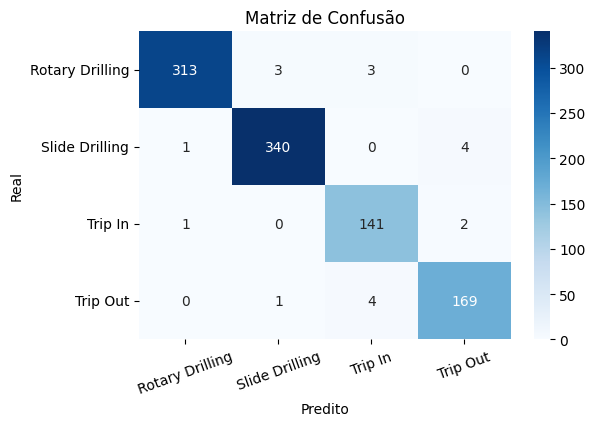

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Split 80/20 estratificado ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

# --- Treinamento ---
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# --- Predição ---
preds = clf.predict(X_test)

# --- Métricas ---
acc = accuracy_score(y_test, preds)
f1 = f1_score(y_test, preds, average="weighted")
report = classification_report(y_test, preds, output_dict=True)
report_df = pd.DataFrame(report).transpose()

print("=== Métricas Gerais ===")
print(f"Acurácia: {acc:.4f}")
print(f"F1-score (weighted): {f1:.4f}\n")

print("=== F1-score por Classe ===")
display(report_df)

# --- Matriz de confusão ---
cm = confusion_matrix(y_test, preds, labels=clf.classes_)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d",
    cmap="Blues", xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xticks(rotation=20)
plt.yticks(rotation=0)
plt.xlabel("Predito")
plt.ylabel("Real")
plt.title("Matriz de Confusão")
plt.show()

Com base nas métricas apresentadas, o modelo demonstra desempenho altamente consistente e equilibrado entre todas as classes. A acurácia geral de 98,07% e o F1-score weighted igualmente de 98,07% indicam que o classificador mantém excelente desempenho mesmo considerando o desbalanceamento natural entre as categorias.

Ao observar os resultados por classe, nota-se que todas apresentam F1-scores elevados, variando aproximadamente entre 0.96 e 0.99, o que mostra que o modelo não favorece nem prejudica operações específicas. Os valores igualmente altos de precision e recall reforçam sua capacidade tanto de identificar corretamente cada tipo de operação quanto de evitar erros de classificação.

Esses resultados indicam que o modelo está capturando de maneira eficiente os padrões presentes nos dados de perfuração, apresentando boa generalização, robustez e comportamento estável entre diferentes modos operacionais como Rotary Drilling, Slide Drilling, Trip In e Trip Out. De forma geral, o desempenho obtido confirma que o classificador é adequado e confiável para esse tipo de aplicação.

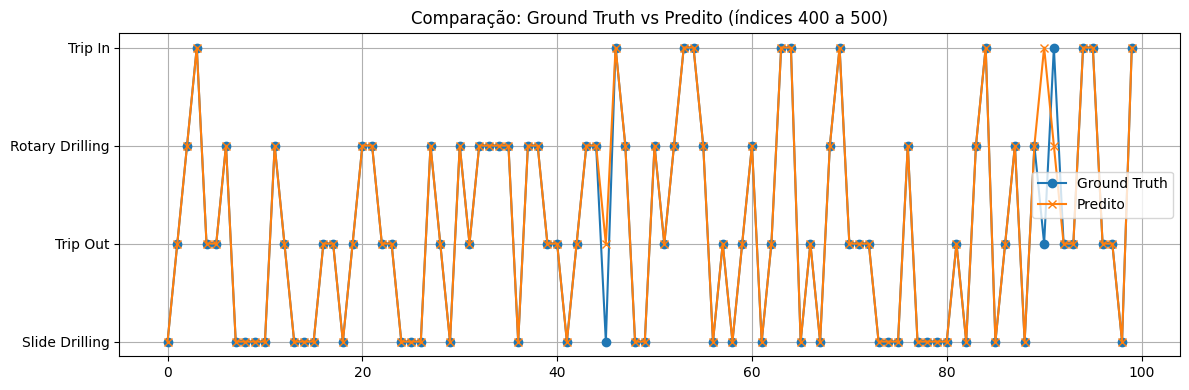

In [ ]:
# Defina o intervalo desejado
i0, i1 = 400, 500

y_test_f = y_test.iloc[i0:i1]
preds_f  = preds[i0:i1]

plt.figure(figsize=(12,4))
plt.plot(y_test_f.values, label="Ground Truth", marker="o")
plt.plot(preds_f, label="Predito", marker="x")
plt.title(f"Comparação: Ground Truth vs Predito (índices {i0} a {i1})")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Na imagem acima, é possível observar alguns poucos casos de erro do classificador, distribuídos de forma pontual entre as classes. Diferentemente de análises anteriores, não há mais um padrão claro de concentração dos erros em um grupo específico de operações — eles ocorrem de maneira mais equilibrada, sem indicar dificuldade particular em distinguir uma classe específica.

Mesmo assim, o gráfico evidencia a boa performance geral do modelo: as predições acompanham de forma consistente o comportamento real das classes, com apenas pequenas divergências isoladas. Isso reforça a estabilidade do classificador e sua capacidade de representar adequadamente as diferentes operações ao longo do tempo.

# Próximos Passos: Recomendações para implementação

**Pontos de Melhoria**
- Confirmação de unidades
- Análise de ocorrência de outliers por tipo de operação
- Análise da reação do modelo com diferentes janelas
- Melhorar interpretação da variável HOOK_LOAD
- Melhorar a apresentação executiva
- Experimentar diferentes hiperparâmetros


**Próximos Passos**

Com o pipeline de pré-processamento, análise e visualização já incorporado ao notebook, as próximas etapas envolvem estruturar a adoção desse fluxo dentro da empresa de forma organizada e alinhada às necessidades operacionais. A seguir, são apresentadas as algumas recomendações para garantir que o processo se consolide como uma ferramenta corporativa escalável.



* Recomenda-se formalizar a estrutura do projeto em diretórios e arquivos específicos, de modo a garantir clareza, rastreabilidade e reprodutibilidade. A organização interna deve contemplar seções para armazenar dados brutos e processados, scripts modulares, notebooks de análise, documentos finais e arquivos de configuração. Essa padronização facilita a manutenção por diferentes usuários e reduz a dependência de conhecimento tácito.


*   Com o pipeline consolidado, torna-se viável criar indicadores operacionais robustos que sintetizem o comportamento das variáveis e facilitem a tomada de decisão. Esses indicadores possibilitam análises comparativas além de permitir a identificação de padrões e oportunidades de melhoria. Exemplos de possíveis indicadores são: "Eficiência de perfuração associada ao conjunto de parâmetros" ou "Faixas ótimas de operação por variável". Esses indicadores podem ser exportados automaticamente pelo pipeline e posteriormente integrados a dashboards internos, fornecendo visibilidade contínua às equipes de engenharia e operações.

*  Com o pipeline estabilizado e os indicadores bem estabelecidos, a empresa estará preparada para avançar para uma fase mais analítica, baseada em modelos preditivos voltados à antecipação de comportamentos operacionais. Possíveis aplicações são: Previsão de tempo de operação, detecção de regimes operacionais ineficientes e identificação de anomalias. Esses modelos podem emitir alertas e recomendações que sejam gerados de forma contínua, conforme novos dados são recebidos.


*  Por fim, para que o pipeline seja efetivamente adotado, é imprescindível preparar a equipe técnica para interpretar corretamente as análises e indicadores gerados. Recomenda-se promover sessões de treinamento.

# Material Adicional

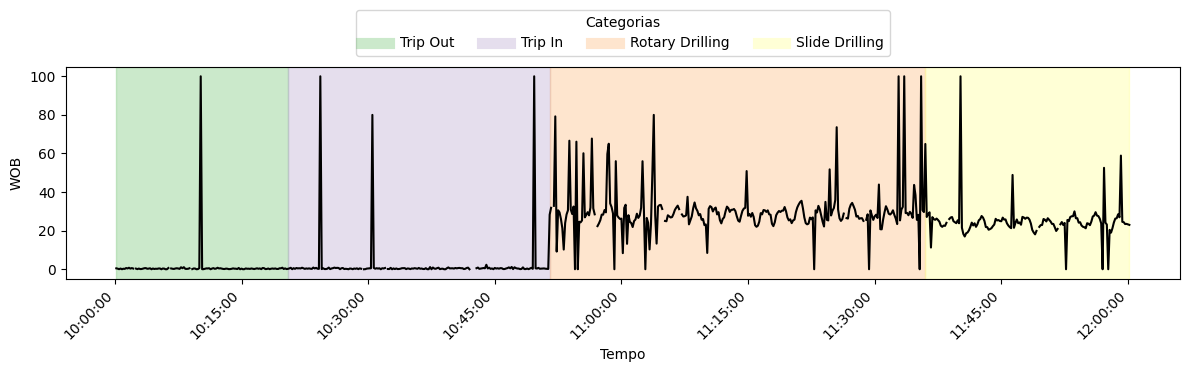

In [ ]:
def plot_with_categorical_highlight(df, var, categories, category_colors=None, figsize=(12,4), alpha=0.4):

    x = df.TIMESTAMP
    y = df[var]
    x = pd.to_datetime(x).reset_index(drop=True).to_numpy()
    y = np.array(y)
    categories = np.array(categories)
    unique_cats = pd.unique(categories)

    if category_colors is None:
        cmap = plt.get_cmap("Accent")
        category_colors = {cat: cmap(i % 20) for i, cat in enumerate(unique_cats)}

    fig, ax = plt.subplots(figsize=figsize)
    ax.plot(x, y, label="Variável", color="black")

    start = 0
    for i in range(1, len(categories)):
        if categories[i] != categories[i-1]:
            ax.axvspan(x[start], x[i],
                       color=category_colors[categories[i-1]],
                       alpha=alpha)
            start = i

    ax.axvspan(x[start], x[-1],
               color=category_colors[categories[-1]],
               alpha=alpha)

    handles = [
        plt.Line2D([0], [0], color=category_colors[cat], lw=8, label=str(cat), alpha=alpha)
        for cat in unique_cats
    ]
    ax.legend(handles=handles, title="Categorias", ncol=len(handles),
          loc="upper center", bbox_to_anchor=(0.5, 1.30))

    ax.xaxis.set_major_locator(mdates.AutoDateLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M:%S"))
    fig.autofmt_xdate(rotation=45)

    ax.set_xlabel("Tempo")
    ax.set_ylabel(f"{var}")
    plt.tight_layout()
    plt.show()

# Datas para filtrar
inicio = "2024-06-15 10:00:10"
fim = "2024-06-15 12:00:10"

# Filtro de datas
filtro = df[(df["TIMESTAMP"] >= inicio) & (df["TIMESTAMP"] <= fim)]
plot_with_categorical_highlight(filtro,'WOB', filtro.OPERATION)